----------
**Kaggle Mini-Project I: Exploratory Data Analysis**
=====================================

Maggie Maurer

CoderGirl, DataScience Cohort

July 2019

----------

- <a href='#1'>1. Libraries and Data</a>  
    - <a href='#1.1'>1.1. Loding Libraries</a> 
    - <a href='#1.2'>1.2. Reading Data</a>
- <a href='#2'>2. Clean the DataFrame</a>  
    - <a href='#2.1'>2.1. Assess and Remove NaN Values</a> 
    - <a href='#2.2'>2.2. Assess and Remove Duplicates</a>    
- <a href='#3'>3. Describe the DataFrame</a>  
    - <a href='#3.1'>3.1. Dataframe Dimensions</a> 
    - <a href='#3.2'>3.2. Improve Dataframe Descriptors</a> 
    - <a href='#3.3'>3.3. Feature Directory</a>
- <a href='#4'>4. Data Preprocesing</a>  
    - <a href='#4.1'>4.1. Assess and Remove Outleirs</a> 
    - <a href='#4.2'>4.2. Examine Potentially Erroneous Values</a> 
    - <a href='#4.3'>4.3. Feature Directory</a>
- <a href='#5'>5. Exploratory Data Analysis</a>
    - <a href='#5.1'>5.1. Overall Correlation Analysis</a> 
    - <a href='#5.2'>5.2. Feature Specific Analysis</a>

# <a id='1'>1. Librairies and Data</a> 

## <a id='#1.1'>1.1. Loding Libraries</a> 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics as st
import seaborn as sns
import warnings
import matplotlib
sns.set(color_codes=True)
%matplotlib inline

## <a id='#1.2'>1.2. Reading Data</a> 

In [10]:
#Read file and import as varible 'heart1'.
heart = pd.read_csv('../input/heart.csv')


# <a id='#2'>2. Clean the DataFrame</a> 

## <a id='#2.1'>2.1. Assess and Remove NaN Values</a> 

In [11]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no NaN values

## <a id='#2.2'>2.2. Assess and Remove Duplicates</a> 

In [12]:
Duplicated=heart.duplicated()
Duplicated2=pd.Series.to_frame(Duplicated)
Duplicated2.head()
print(Duplicated2.loc[Duplicated2.loc[:,0]==True])
heart.loc[164, :]

        0
164  True


age          38.0
sex           1.0
cp            2.0
trestbps    138.0
chol        175.0
fbs           0.0
restecg       1.0
thalach     173.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            4.0
thal          2.0
target        1.0
Name: 164, dtype: float64

As we can see, there is one duplicated row- row 164. Let's see what that is and what row it is a duplicate of.

In [13]:
heart.loc[heart.loc[:,'chol']==175.0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


I am going to assume that line 164 is invalid. I am assuming this (as opposed to them being the records of two patients with exactly the same patient details) is for two reasons: 
1. The duplicates are two lines next to each other 
2. There are 14 features, which reduces the liklihood of them belonging to two seperate patients

Since I have determined the duplicates are most likely due to data input error, I am going to remove the duplicated row.

In [14]:
heart2= heart.drop(heart.index[164])

# <a id='#3'>3. Describe the DataFrame</a>

## <a id='#3.1'>3.1. Dataframe Description and Dimensions</a> 

This dataset contains many health and medical indicators, such as systolic blood pressure and serum cholesteral levels.  

The goal of this project is to create a predictive model of Heart Disease (HD) based on the features in this dataset.

In [15]:
print("The DataFrame has", heart2.shape[0], "rows and", heart2.shape[1], "columns.")

The DataFrame has 302 rows and 14 columns.


## <a id='#3.2'>3.2. Improve Dataframe Descriptors</a> 

In [16]:
heart2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

These names are not particularily descriptive, so I am going to change them.

In [17]:
heart2.columns=['age', 'sex', 'cpain','resting_BP', 'chol', 'fasting_BS', 'resting_EKG', 
                'max_HR', 'exercise_ANG', 'ST_depression', 'm_exercise_ST', 'no_maj_vessels', 'thal', 'target']

I do not like how numbers represent different subsets of features (1 for Typical Angina Pain, for example). However, many Machiene Learning Algorithms require discrete values to be integers or floats. 

So, I am going to keep (and update) two dataframes, not with the numeric values and one with descriptive labels.

In [18]:
heart2.head()
heart3=pd.DataFrame.copy(heart2)
heart3['sex']=heart3['sex'].replace([1, 0], ['Male', 'Female'])
heart3['cpain']=heart3['cpain'].replace([0, 1, 2, 3], ['Asymptomatic', 'Typical Angina', 'Atypical Angina', 'Non-Angina'])
heart3['fasting_BS']=heart3['fasting_BS'].replace([1, 0], ['BS > 120 mg/dl', 'BS < 120 mg/dl'])
heart3['resting_EKG']=heart3['resting_EKG'].replace([0, 1, 2], ['Normal', 'Left Ventricular Hypertrophy', 'ST-T Wave Abnormality'])
heart3['exercise_ANG']=heart3['exercise_ANG'].replace([0, 1], ['Absent', 'Present'])
heart3['m_exercise_ST']=heart3['m_exercise_ST'].replace([0, 1, 2], ['Upsloping', 'Flat', 'Downsloping'])
heart3['thal']=heart3['thal'].replace([1, 2, 3], ['Fixed Defect', 'Normal', 'Reversible Defect'])
heart3['target']=heart3['target'].replace([0, 1], ['Absent', 'Present'])

## <a id='#3.3'>3.3. Feature Directory</a> 

### <a id=''>1. 'age':  Age (years) </a> 
   * Datatype: non-null int64
   * Min: 29.0
   * Max: 77.0
   * Mean: 54.4
   * Median: 55.5
   * Mode: 58.0   

Text(0, 0.5, 'Frequency')

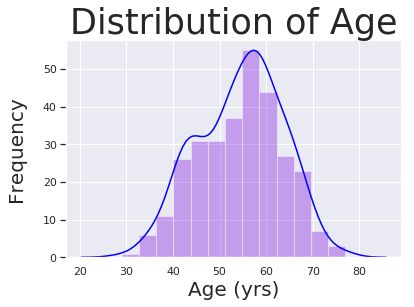

In [19]:
warnings.filterwarnings('ignore')
ax1 = sns.distplot(heart2['age'], kde=False, color='blueviolet')
ax1.set_xlabel("Age (yrs)", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['age'], ax=second_ax1, kde=True, hist=False, color='blue')
second_ax1.set_yticks([])
plt.title("Distribution of Age", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)

### <a id=''>2. 'sex':  Provider-Identified Gender</a> 
  
   * Datatype: non-null int64   
   * 0: Female
        * Count: 96        
   * 1: Male  
        * Count:206

Text(0.5, 0, 'Provider-Identified Gender')

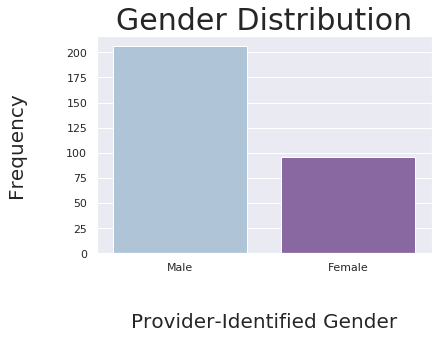

In [20]:
ax1 = sns.countplot(heart3['sex'], palette="BuPu")
plt.title("Gender Distribution", size=30)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Provider-Identified Gender", labelpad=40, size=20)





### <a id=''>3. 'cpain': Chest Pain Type</a> 
   * Datatype: non-null int64
   * 0: Asymptomatic Pain
        * Count: 143
   * 1: Typical Angina Pain
        * Count: 50
   * 2: Atypical Angina Pain
        * Count: 86
   * 3: Non-Angina Pain
        * Count: 23

Text(0.5, 0, 'Chest Pain Description')

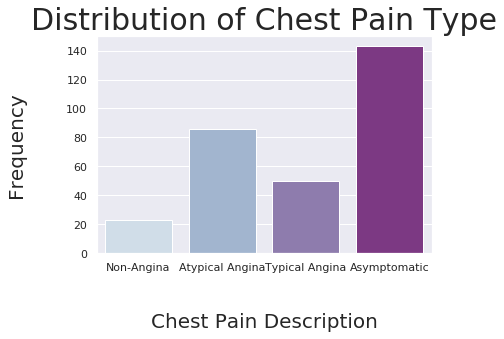

In [21]:
ax1 = sns.countplot(heart3['cpain'], palette="BuPu")
plt.title("Distribution of Chest Pain Type", size=30)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Chest Pain Description", labelpad=40, size=20)





### <a id=''>4. 'resting_BP': Resting Systolic Blood Pressure (mm Hg) upon Hospital Admission</a> 
   * Datatype: non-null int64  

   * Min: 94.0

   * Max: 200.0

   * Mean: 131.6

   * Median: 130.0

   * Mode: 120.0

Text(0, 0.5, 'Frequency')

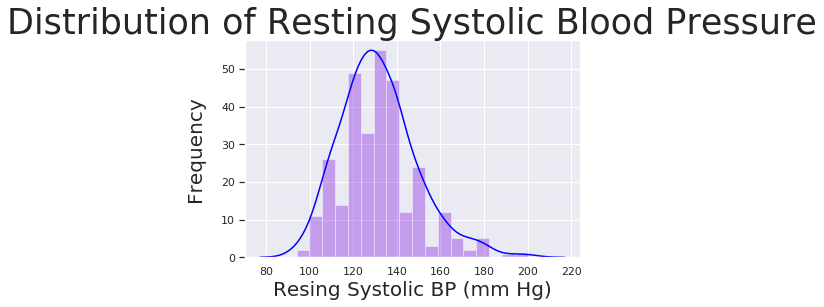

In [22]:
warnings.filterwarnings('ignore')
ax1 = sns.distplot(heart2['resting_BP'], kde=False, color='blueviolet')
ax1.set_xlabel("Resing Systolic BP (mm Hg)", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['resting_BP'], ax=second_ax1, kde=True, hist=False, color='blue')
second_ax1.set_yticks([])
plt.title("Distribution of Resting Systolic Blood Pressure", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)

### <a id=''>5. 'chol': Serum Cholesterol (mg/dl)</a>
   * Datatype: non-null int64  
   * Min: 126.0
   * Max: 564.0
   * Mean: 264.5
   * Median: 240.5
   * Mode: 197.0, 204.0, 234.0

Text(0, 0.5, 'Frequency')

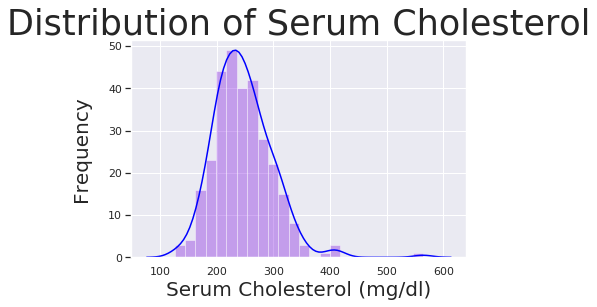

In [23]:
warnings.filterwarnings('ignore')
ax1 = sns.distplot(heart2['chol'], kde=False, color='blueviolet')
ax1.set_xlabel("Serum Cholesterol (mg/dl)", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['chol'], ax=second_ax1, kde=True, hist=False, color='blue')
second_ax1.set_yticks([])
plt.title("Distribution of Serum Cholesterol", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)

### <a id=''>6. 'fasting_BS': Fasting Blood Sugar (mmol/L)</a>
   * Datatype: non-null int64
   * 1: greater than 120 mmol/L
        * count: 45
   * 0: lower than 120 mmol/L
        * count: 257

Text(0.5, 0, 'Level of Fasting BS (mmol/L)')

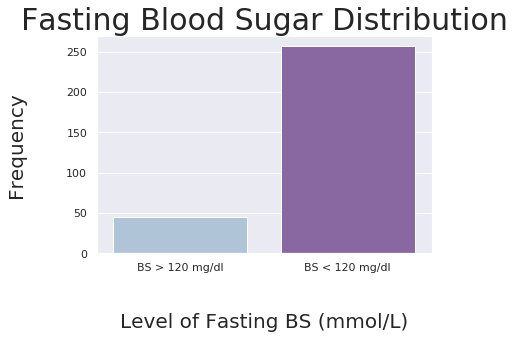

In [24]:
ax1 = sns.countplot(heart3['fasting_BS'], palette="BuPu")
plt.title("Fasting Blood Sugar Distribution", size=30)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Level of Fasting BS (mmol/L)", labelpad=40, size=20)

### <a id=''>7. 'resting_EKG': Resting EKG</a>
   * Datatype: non-null int64
   * 0: Normal EKG results
        * count: 147 
   * 1: Showing probable or definite left ventricular hypertrophy by Estes' criteria
        * count: 151
   * 2: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        * count: 4

Text(0.5, 0, ' ')

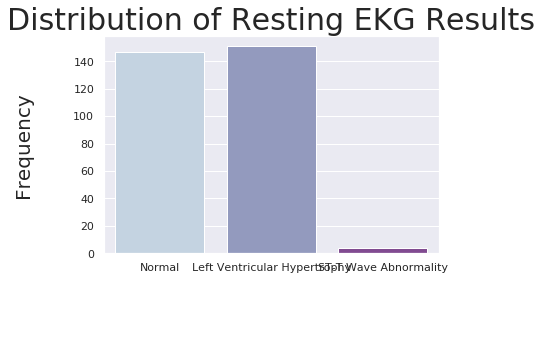

In [25]:
ax1 = sns.countplot(heart3['resting_EKG'], palette="BuPu")
plt.title("Distribution of Resting EKG Results", size=30)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel(" ", labelpad=40, size=20)

### <a id=''>8. 'max_HR': Maximum Heart Rate Achieved (bpm)</a>
   * Datatype: non-null int64  
   * Min: 71.0
   * Max: 202.0
   * Mean: 149.6
   * Median: 152.5
   * Mode: 162.0

Text(0, 0.5, 'Frequency')

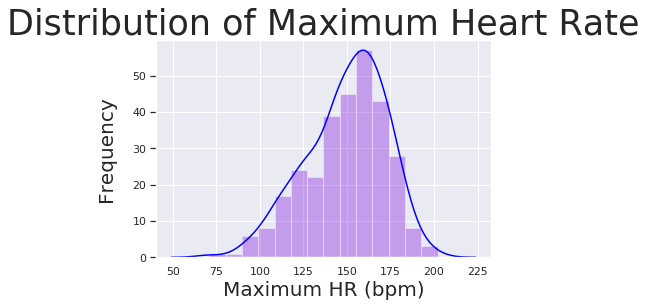

In [26]:
warnings.filterwarnings('ignore')
ax1 = sns.distplot(heart2['max_HR'], kde=False, color='blueviolet')
ax1.set_xlabel("Maximum HR (bpm)", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['max_HR'], ax=second_ax1, kde=True, hist=False, color='blue')
second_ax1.set_yticks([])
plt.title("Distribution of Maximum Heart Rate", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)

### <a id=''>9. 'exercise_ANG': Exercise Induced Angina (EIA)</a>
   * Datatype: non-null int64
   * 0: no, they did not experience EIA
        * count: 203
   * 1: yes, they experienced EIA
        * count: 99

Text(0.5, 0, 'Exercise Induced Angina')

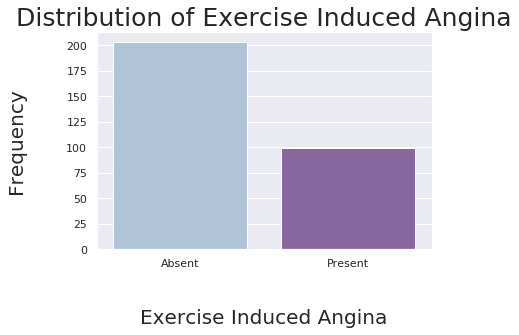

In [27]:
ax1 = sns.countplot(heart3['exercise_ANG'], palette="BuPu")
plt.title("Distribution of Exercise Induced Angina", size=25)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Exercise Induced Angina", labelpad=40, size=20)

### <a id=''>10. 'ST_depression': ST Depression (mm) Induced by Exercise Relative to Rest</a>
   * Datatype: non-null float64 
   * Min: 0.0
   * Max: 6.2
   * Mean: 1.04
   * Median: 0.8
   * Mode: 0.0

(0, 7)

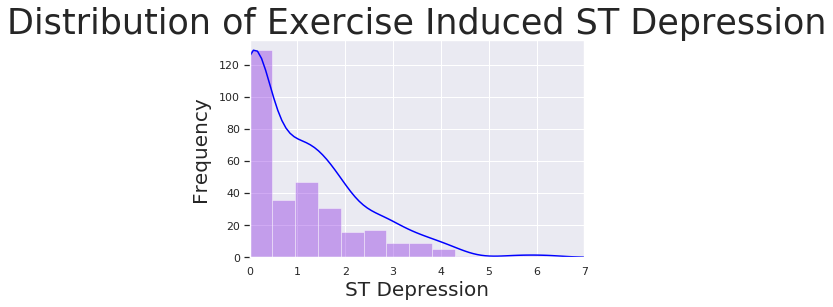

In [28]:
warnings.filterwarnings('ignore')
ax1 = sns.distplot(heart2['ST_depression'], kde=False, color='blueviolet')
ax1.set_xlabel("ST Depression", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['ST_depression'], ax=second_ax1, kde=True, hist=False, color='blue')
second_ax1.set_yticks([])
plt.title("Distribution of Exercise Induced ST Depression", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlim(0,7)

### <a id=''>11. 'm_exercise_ST': The Slope of the Peak Exercise ST Segment</a>
   * Datatype: non-null int64
   * 0: upsloping
        * count: 21
   * 1: flat
        * count: 140
   * 2: downsloping
        * count: 141

Text(0.5, 0, 'Slope  (Peak Exercise)')

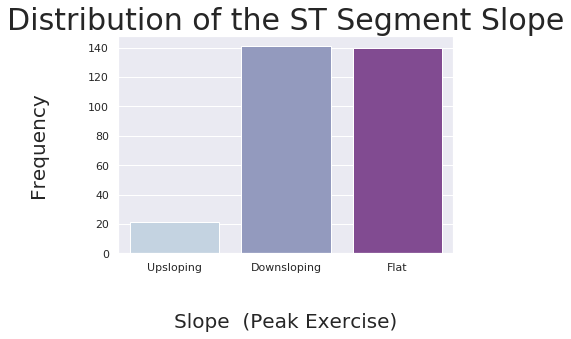

In [29]:
ax1 = sns.countplot(heart3['m_exercise_ST'], palette="BuPu")
plt.title("Distribution of the ST Segment Slope", size=30)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Slope  (Peak Exercise)", labelpad=40, size=20)

### <a id=''>12. 'no_maj_vessels': Number of Major Vessels (0-3) Colored by Flourosopy</a>
   * Datatype: non-null int64
   * Counts:
        * 0: 175
        * 1: 65
        * 2: 38
        * 3: 20
        * 4: 4

Text(0.5, 0, 'Number of Major Vessels')

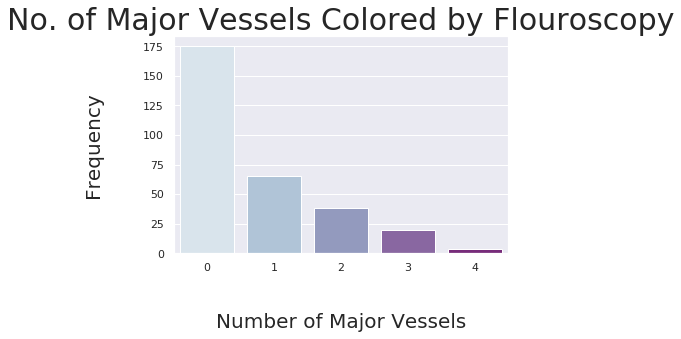

In [30]:
ax1 = sns.countplot(heart3['no_maj_vessels'], palette="BuPu")
plt.title("No. of Major Vessels Colored by Flouroscopy", size=30)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Number of Major Vessels", labelpad=40, size=20)

### <a id=''>13. 'thal': Thalium Stress Test Result</a>
   * Datatype: non-null int64
   * 0: Unspecified, will attend to in further data cleaning
        * count: 2
   * 1: fixed defect
        * count: 18
   * 2: normal
        * count: 165
   * 3: reversible defect
        * count: 117

Text(0.5, 0, 'Results')

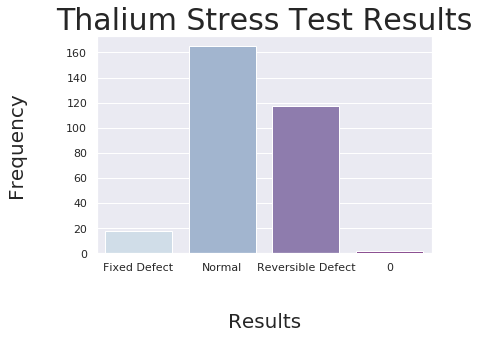

In [31]:
ax1 = sns.countplot(heart3['thal'], palette="BuPu")
plt.title("Thalium Stress Test Results", size=30)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Results", labelpad=40, size=20)

### <a id=''>14. 'target': Absence or Presence of Heart Disease</a>
   * Datatype: non-null int64
   * 0: no heart disease
        * count: 138
   * 1: heart disease present
        * count: 164

Text(0.5, 0, 'HD Diagnosis')

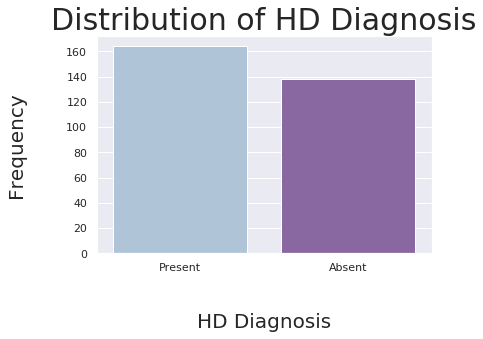

In [32]:
ax1 = sns.countplot(heart3['target'], palette="BuPu")
plt.title("Distribution of HD Diagnosis", size=30)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("HD Diagnosis", labelpad=40, size=20)

All values above derived from the following lines of code:

* heart2.describe()
* heart2.median()
* heart2.mode()
* heart2.info()
* heart2.target.value_counts()
* heart2.thal.value_counts()
* heart2.no_maj_vessels.value_counts()
* heart2.m_exercise_ST.value_counts()
* heart2.exercise_ANG.value_counts()
* heart2.resting_EKG.value_counts()
* heart2.fasting_BS.value_counts()
* heart2.cpain.value_counts()
* heart2.sex.value_counts()

# <a id='#4'>4. Data Preprocesing</a> 

## <a id='#4.1'>4.1. Assess and Remove Outleirs</a> 

I am going to look for outliers using a Standard Deviation method.

I am making a function which will find all outliers 3 standard deviations or more from the mean.

It's important here to know the data you are working with. The following features cannot have (meaningful) outliers: 
   * Sex, discrete 0 or 1 
   * Chest pain type, discrete 0-3 
   * Fasting blood sugar, discrete 0 or 1
   * Resting EKG, discrete 0 or 1 
   * Exercise induced angina, discrete 0 or 1 
   * Slope of the peak exercise ST segment discrete 0-2 
   * Number of major vessels colored, discrete 0-4 
   * Thal, discrete 0-3 
   * Target, discrete 0 or 1

In [33]:
def outliers3STD(df, rowname, title):
    value= pd.DataFrame(df.loc[:,rowname])
    mean, std= DataFrame.mean(value), DataFrame.std(value)
    COvalue=std*3
    lower, upper=mean - COvalue, mean + COvalue
    lower=int(lower)
    upper=int(upper)
    dfToList = df[rowname].tolist()
    outlierlow = [x for x in dfToList if x < lower]
    outlierhigh= [x for x in dfToList if x > upper]
    print(title,'low', outlierlow)
    print(title,'high', outlierhigh)

AGE=outliers3STD(heart2, 'age', 'AGE')
RESTING_BP=outliers3STD(heart2, 'resting_BP', 'RESTING_BP')
CHOL=outliers3STD(heart2, 'chol', 'CHOL')
MAX_HR=outliers3STD(heart2, 'max_HR', 'MAX_HR')
ST_DEPRESSION=outliers3STD(heart2, 'ST_depression', 'ST_DEPRESSION')

AGE low []
AGE high []
RESTING_BP low []
RESTING_BP high [200, 192]
CHOL low []
CHOL high [417, 564, 407, 409]
MAX_HR low [71]
MAX_HR high []
ST_DEPRESSION low []
ST_DEPRESSION high [4.2, 6.2, 5.6, 4.2, 4.4]


So, the following outliers (3 SDT from the mean) exist:
  * resting_BP of 200, 192 
  * chol of 417, 564, 407, 409 
  * max heart rate of 71 
  * st_depression of 4.2, 6.2, 5.6, 4.2, 4.4

Now, let's looks at these values individually

### <a id=''>A. Resting Systolic Blood Pressure (mm Hg)</a> 
   * Outliers: 200, 192

The resting blood pressures values are the systolic blood pressures upon admission. According to the CDC, high systolic blood pressure are values above 140, but values as high as our outliers would indicate hypertensive crisis. As this study examines people with heart disease, these values may be meaningful outliers.

Let's take a second look at the distribution to get more information.

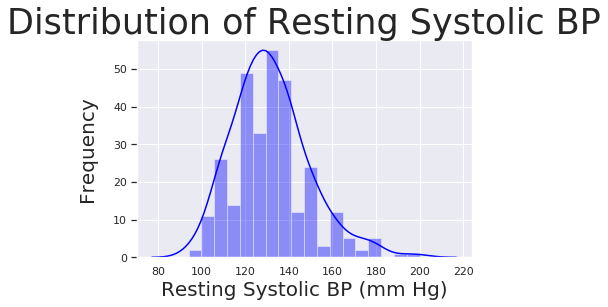

In [34]:
import warnings
warnings.filterwarnings('ignore')

ax1 = sns.distplot(heart2['resting_BP'], kde=False, color='blue')
ax1.set_xlabel("Resting Systolic BP (mm Hg)", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['resting_BP'], ax=second_ax1, kde=True, hist=False, color='blue')
second_ax1.set_yticks([])
plt.title("Distribution of Resting Systolic BP", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

As we can see, the distribution is not normal and has a tail on the left (high blood pressure) side. 

Let's see if that changes in the target population (those with heart disease v those without):

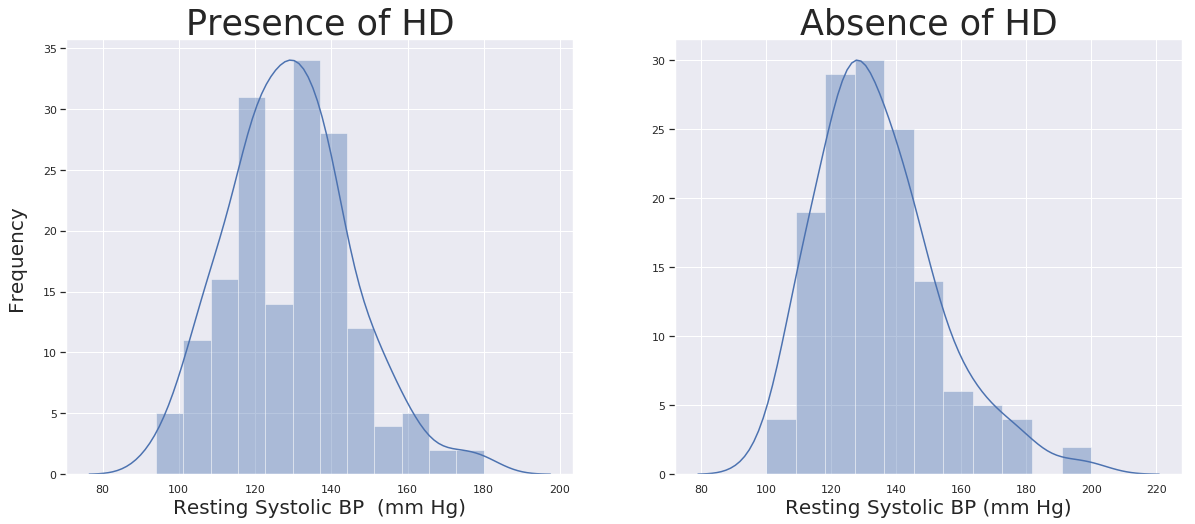

In [35]:
plt.subplot(1,2,1)
plot1 = heart2[heart2.target == 1]
ax1 = sns.distplot(plot1['resting_BP'], kde=False)
ax1.set_xlabel("Resting Systolic BP  (mm Hg)", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(plot1['resting_BP'], ax=second_ax1, kde=True, hist=False)
second_ax1.set_yticks([])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)


plt.subplot(1,2,2)
plot0 = heart2[heart2.target == 0]
ax0 = sns.distplot(plot0['resting_BP'], kde=False)
ax0.set_xlabel("Resting Systolic BP (mm Hg)", fontsize=20)
second_ax0 = ax0.twinx()
sns.distplot(plot0['resting_BP'], ax=second_ax0, kde=True, hist=False)
second_ax0.set_yticks([])
plt.title("Absence of HD", size=35)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 22
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

It looks like the blood pressure in the patients without heart disease centers around 130mm Hg.  130 is a high number, but it would not be abnormal for someone seeking cardiac care. In the patients with heart disease, there is a strange drop off at about 130mm Hg.

The aformentioned outliers skew the distribution slightly. It is interesting to note that both outliers of 200 and 192 were present in people not diagnosed with heart disease.

As both curves are relatively normal, and would be slightly skewed to the left regardless of whether or not the outliers were removed, I am going to keep them in the dataset.

### <a id=''>B. Serum Cholesterol Levels (mg/dl)</a> 
   * Outliers: 417, 564, 407, 409

The outlying cholesterol levels of are VERY high. The maximum value (546) is over twice the mean (264.5).  

Let's take another look at the distribution.

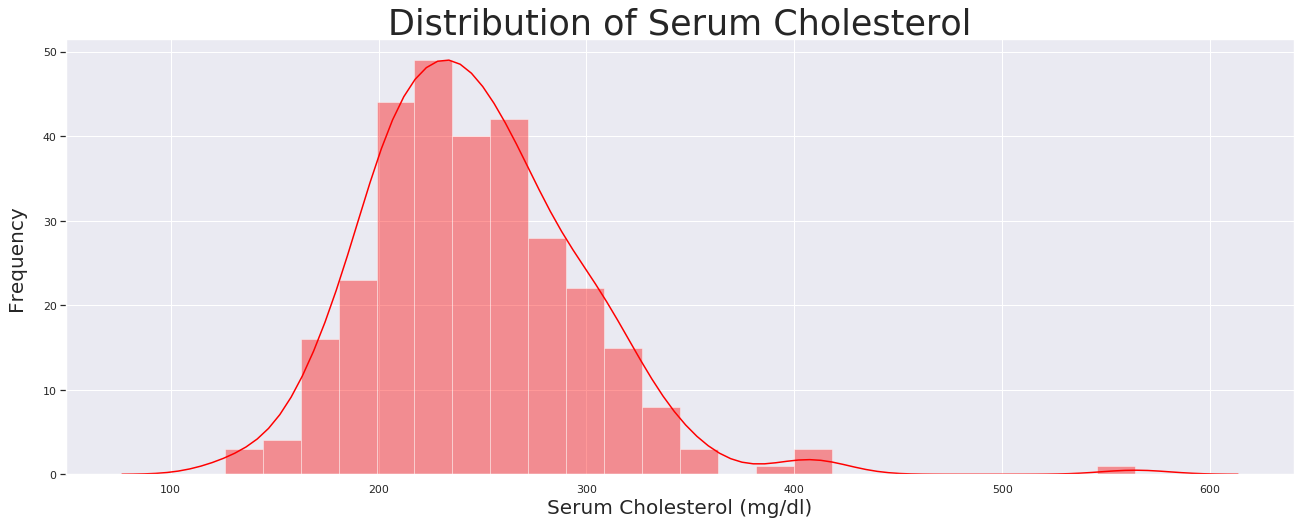

In [36]:
ax1 = sns.distplot(heart2['chol'], kde=False, color='red')
ax1.set_xlabel("Serum Cholesterol (mg/dl)", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['chol'], ax=second_ax1, kde=True, hist=False, color='red')
second_ax1.set_yticks([])
plt.title("Distribution of Serum Cholesterol", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 22
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

The outlying cholesterol levels are extremly far away from the the center of the distribution curve. Let's look at the rows containing the outliers. That way we can see if they possess any other outlying feature values.

In [37]:
heart2.loc[heart2.loc[:,'chol']>400]

,age,sex,cpain,resting_BP,chol,fasting_BS,resting_EKG,max_HR,exercise_ANG,ST_depression,m_exercise_ST,no_maj_vessels,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


Aside from cholesterol, none of the other above features contain outliers. Furthermore, there is not a clear trend linking the outlying cholesterol levels to the presence or absence of heart disease. 

Before, I remove the outliers, let's look at how the cholesterol distribution varies between people with and without heart disease.

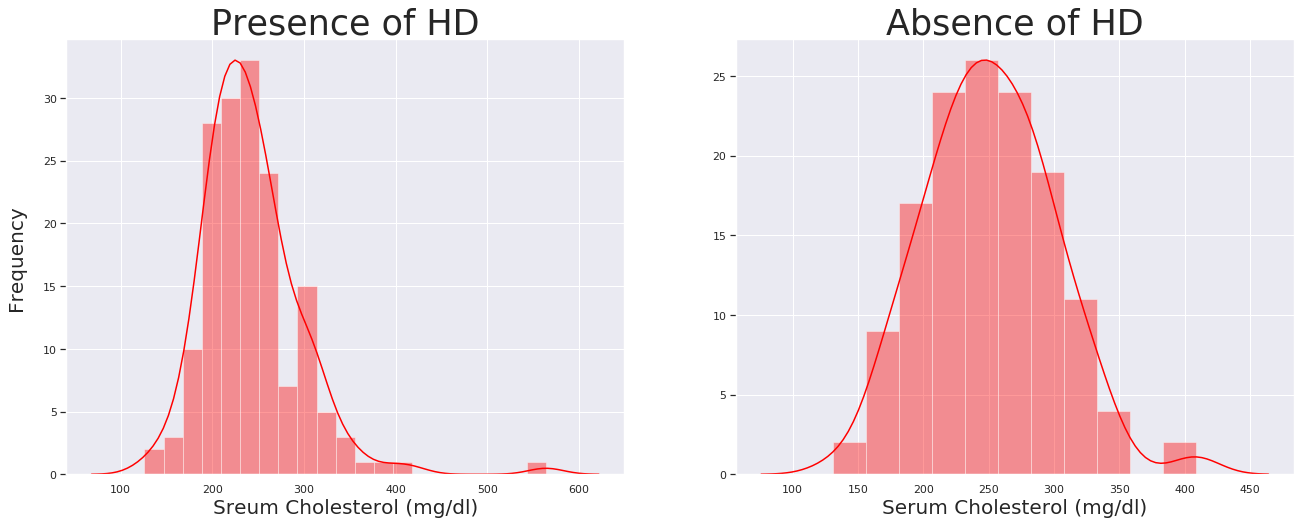

In [38]:
plt.subplot(1,2,1)
plot1 = heart2[heart2.target == 1]
ax1 = sns.distplot(plot1['chol'], kde=False, color='red')
ax1.set_xlabel("Sreum Cholesterol (mg/dl)", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(plot1['chol'], ax=second_ax1, kde=True, hist=False, color='red')
second_ax1.set_yticks([])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)


plt.subplot(1,2,2)
plot0 = heart2[heart2.target == 0]
ax0 = sns.distplot(plot0['chol'], kde=False, color='red')
ax0.set_xlabel("Serum Cholesterol (mg/dl)", fontsize=20)
second_ax0 = ax0.twinx()
sns.distplot(plot0['chol'], ax=second_ax0, kde=True, hist=False, color='red')
second_ax0.set_yticks([])
plt.title("Absence of HD", size=35)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 22
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Aside from the two outliers, the distribution of cholesterol levels in people without HD is very normal and symmetrical. The distribuiton of the cholesterol levels in people with HD has a tail on the right hand side.

As the 4 outliers noted above to not seem to mesh with the distribution of cholesterol levels as a whole, I am going to remove them. They will be replace with the average (mean) cholesterol of their respective target values.

In [39]:
heart4 = heart2[heart2.chol < 400]
heart4P=heart4.loc[heart4.loc[:,'target']==1]
heart4A=heart4.loc[heart4.loc[:,'target']==0]

print("Mean serum cholesterol in those with heart disease is:", heart4P.chol.mean())
print("Mean serum cholesterol in those without heart disease is:", heart4A.chol.mean())

Mean serum cholesterol in those with heart disease is: 239.58024691358025
Mean serum cholesterol in those without heart disease is: 248.77941176470588


In [40]:
heart2['chol']=heart2['chol'].replace([417, 564], 240)
heart2['chol']=heart2['chol'].replace([407, 409], 249)

heart3['chol']=heart3['chol'].replace([417, 564], 240)
heart3['chol']=heart3['chol'].replace([407, 409], 249)

### <a id=''>C. Maximum Heartrate (bpm)</a> 
   * Outlier: 71 bpm

The maximum heart rate of 71 is quite low compared to the mean (it is roughly half of the mean, 149.6). However, it is a realistic number. 

Let's examine the the distribution.

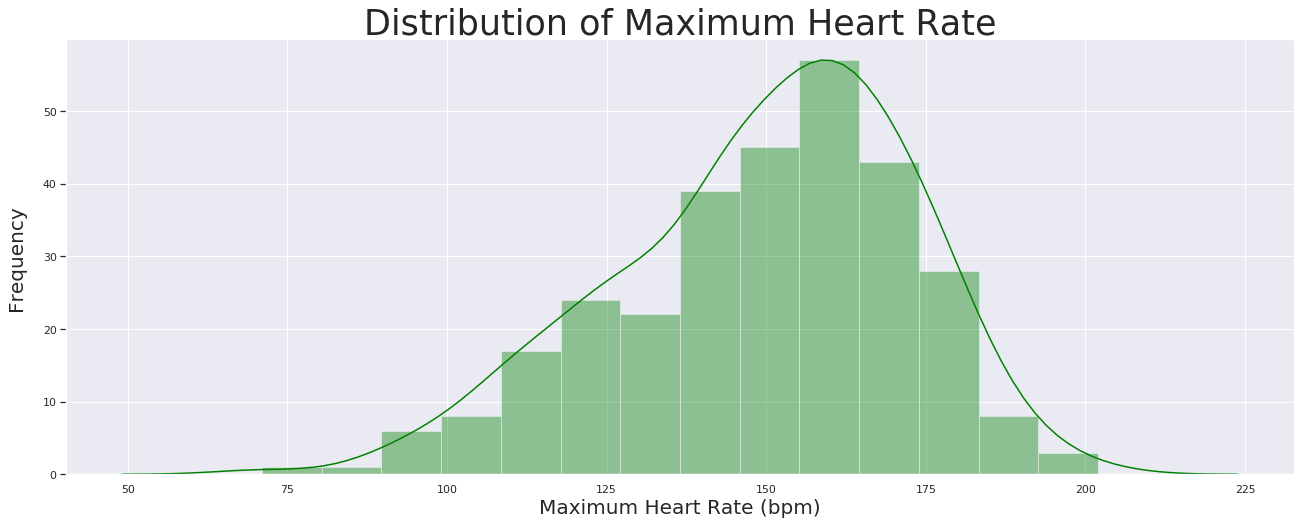

In [41]:
ax1 = sns.distplot(heart2['max_HR'], kde=False, color='green')
ax1.set_xlabel("Maximum Heart Rate (bpm)", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['max_HR'], ax=second_ax1, kde=True, hist=False, color='green')
second_ax1.set_yticks([])
plt.title("Distribution of Maximum Heart Rate", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 22
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

As we can see, the distribution is not normal and has a tail on the right (low maximum heartrate) side. Let's see if that changes in the target population (those with heart disease v those without).

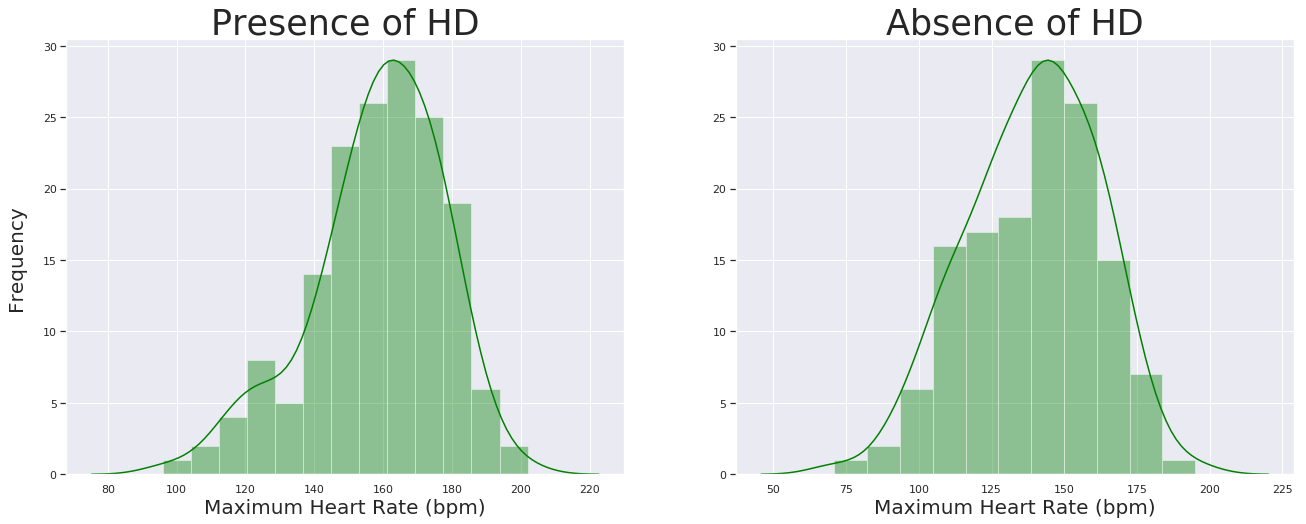

In [42]:
plt.subplot(1,2,1)
plot1 = heart2[heart2.target == 1]
ax1 = sns.distplot(plot1['max_HR'], kde=False, color='green')
ax1.set_xlabel("Maximum Heart Rate (bpm)", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(plot1['max_HR'], ax=second_ax1, kde=True, hist=False, color='green')
second_ax1.set_yticks([])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)


plt.subplot(1,2,2)
plot0 = heart2[heart2.target == 0]
ax0 = sns.distplot(plot0['max_HR'], kde=False, color='green')
ax0.set_xlabel("Maximum Heart Rate (bpm)", fontsize=20)
second_ax0 = ax0.twinx()
sns.distplot(plot0['max_HR'], ax=second_ax0, kde=True, hist=False, color='green')
second_ax0.set_yticks([])
plt.title("Absence of HD", size=35)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 22
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Interestingly, both distributions are skewed slightly to the left. As the outlier of 71 seems to fit into that general trend, I am going to leave it in the data set.

### <a id=''>D. ST Depression (mm) Induced by Exercise Relative to Rest</a> 

* Outliers: 4.2, 6.2, 5.6, 4.2, 4.4

The above outliers are significantly higher than the:
   * Mean (1.04)
   * Median (0.8)
   * Mode (0.0). 

Let's look at the distribution.

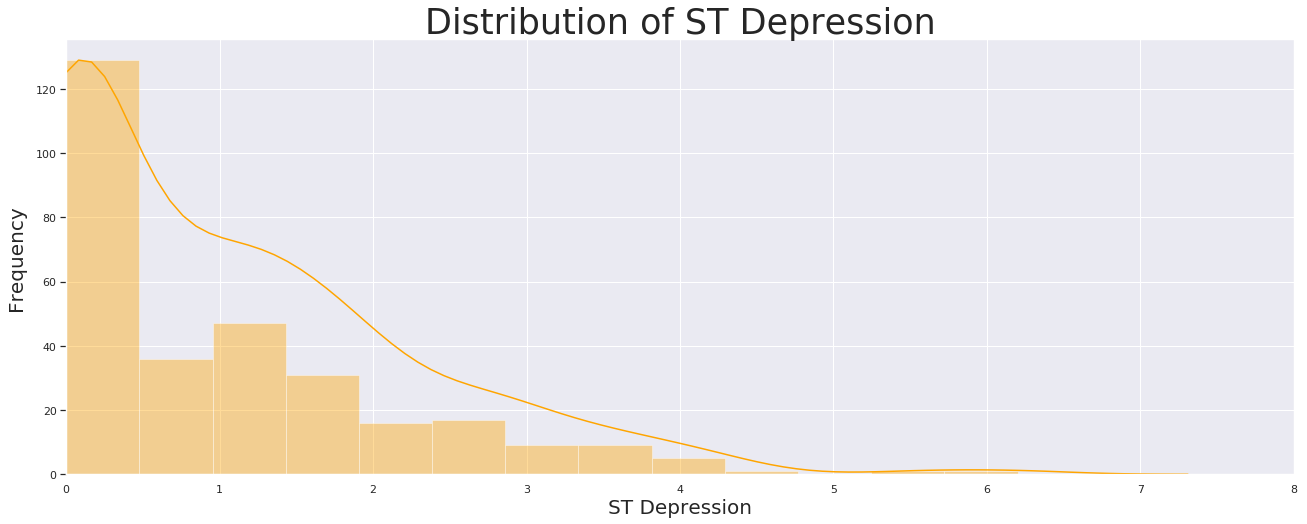

In [43]:
ax1 = sns.distplot(heart2['ST_depression'], kde=False, color='orange')
ax1.set_xlabel("ST Depression", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(heart2['ST_depression'], ax=second_ax1, kde=True, hist=False, color='orange')
second_ax1.set_yticks([])
plt.title("Distribution of ST Depression", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlim(0, 8)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 22
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Looking at the information given, An ST depression of 0 is normal, while an ST depression below 0 can be indicative of Heart Disease. Let's look at the distribution and stats (mean, median, mode) once I remove the 0 values.

The Mean, Median, and Mode in the Absence of Normal ST Depression Values
Mean: 1.5441176470588236
Median: 1.4
Modes: 0    1.2
dtype: float64


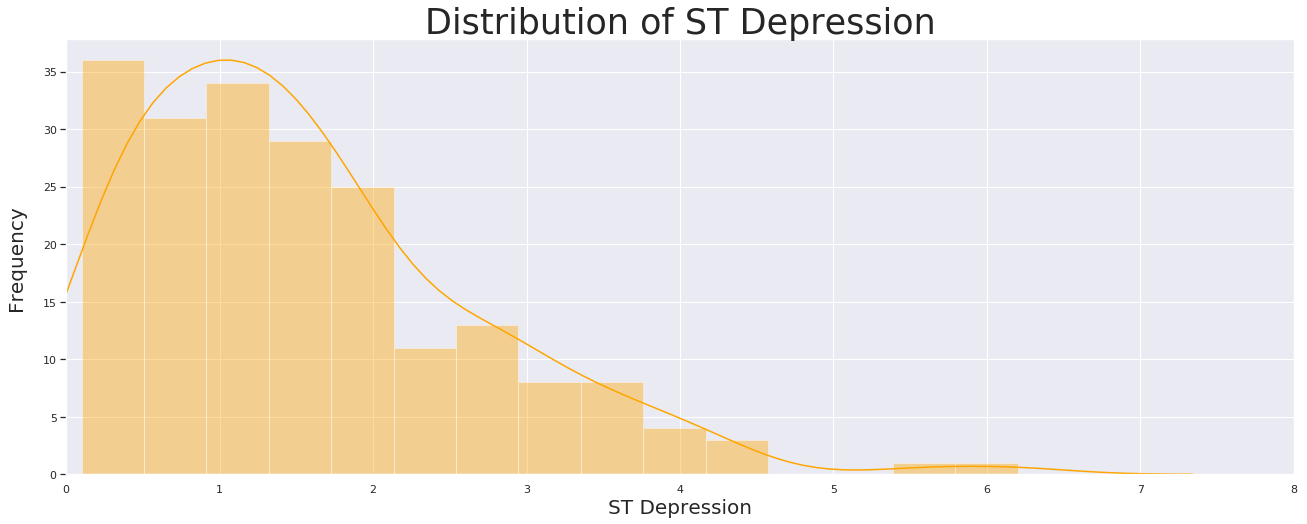

In [44]:
ABNORMALST = heart2[heart2.ST_depression != 0]
ax1 = sns.distplot(ABNORMALST['ST_depression'], kde=False, color='orange')
ax1.set_xlabel("ST Depression", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(ABNORMALST['ST_depression'], ax=second_ax1, kde=True, hist=False, color='orange')
second_ax1.set_yticks([])
plt.title("Distribution of ST Depression", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlim(0, 8)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 22
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

print("The Mean, Median, and Mode in the Absence of Normal ST Depression Values")
print("Mean:", ABNORMALST['ST_depression'].mean())
print("Median:", ABNORMALST['ST_depression'].median())
print("Modes:", ABNORMALST['ST_depression'].mode())

While the mean, median, and one of the modes are now slighlty closer to the outlying values, the distribtion is still far to skewed to the right to be normal.

Let's look at the distribution once the outliers are removed.

The Mean, Median, and Mode in the Absence of Normal ST Depression Values and Outliers
Mean: 1.45929648241206
Median: 1.2
Modes: 0    1.2
dtype: float64


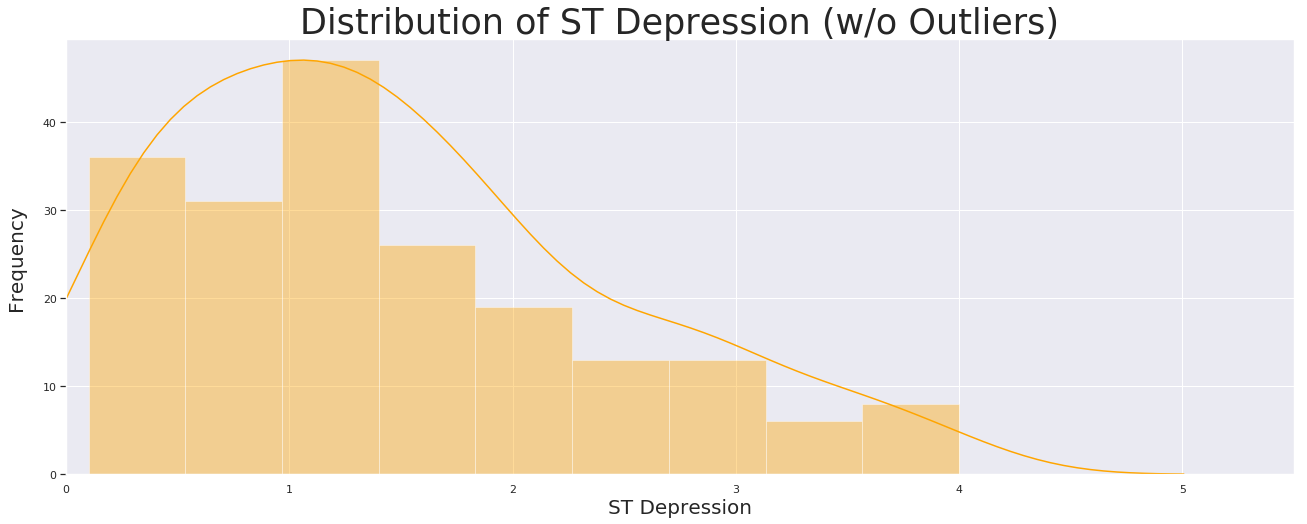

In [45]:
ABNST = ABNORMALST[ABNORMALST.ST_depression <= 4]
ax1 = sns.distplot(ABNST['ST_depression'], kde=False, color='orange')
ax1.set_xlabel("ST Depression", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(ABNST['ST_depression'], ax=second_ax1, kde=True, hist=False, color='orange')
second_ax1.set_yticks([])
plt.title("Distribution of ST Depression (w/o Outliers)", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlim(0, 5.5)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 22
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

print("The Mean, Median, and Mode in the Absence of Normal ST Depression Values and Outliers")
print("Mean:", ABNST['ST_depression'].mean())
print("Median:", ABNST['ST_depression'].median())
print("Modes:", ABNST['ST_depression'].mode())

The distribtuion looks slightly more normal, but is still skewed to the right significantly. 

Also, the mean, median, and mode are not significantly different before and after removing the outliers.

I wonder if it would look more normal is I took log base 10 of all the values.

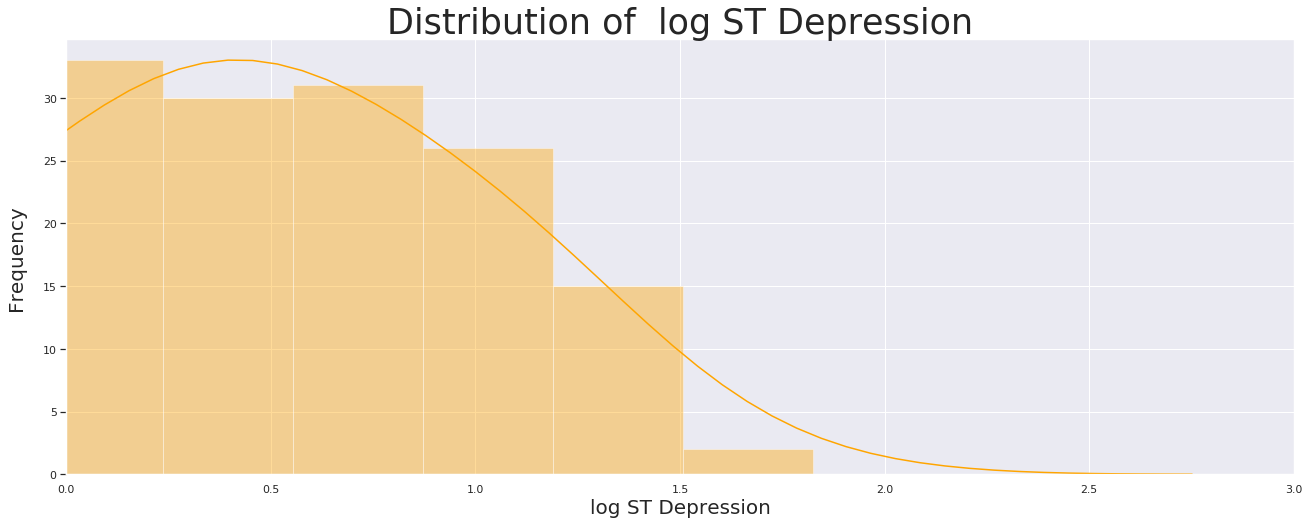

In [46]:
ABNORMALST['log_ST_depression'] = ABNORMALST.apply(lambda row: np.log(row.ST_depression), axis = 1) 
ax1 = sns.distplot(ABNORMALST['log_ST_depression'], kde=False, color='orange')
ax1.set_xlabel("log ST Depression", fontsize=20)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(ABNORMALST['log_ST_depression'], ax=second_ax1, kde=True, hist=False, color='orange')
second_ax1.set_yticks([])
plt.title("Distribution of  log ST Depression", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlim(0, 3)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 22
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

It does not seem *that* much more normal. So, I am going to keep the outliers present, but I am going to make an important change to the dataframe: 
   * I am going to make a new binary feature indicating if an abnormal (non-0) ST depression was found.
    
Please note that I cannot normalize the full ST depression column with the normal (0) values, as the log of 0 give a NaN value

In [47]:
heart2['ST_depressionAB']=heart2['ST_depression'].apply(lambda row: 1 if row > 0 else 0)
heart2A=heart2.iloc[:,0:11]
heart2B=heart2.iloc[:,11:14]
heart2C=heart2.loc[:,'ST_depressionAB']
heart2C=pd.DataFrame(heart2C)
heart2C.head()
heart2 = pd.concat([heart2A, heart2C, heart2B], axis=1, join_axes=[heart2A.index])

heart3['ST_depressionAB']=heart3['ST_depression'].apply(lambda row: 1 if row > 0 else 0)
heart3A=heart3.iloc[:,0:11]
heart3B=heart3.iloc[:,11:14]
heart3C=heart3.loc[:,'ST_depressionAB']
heart3C=pd.DataFrame(heart3C)
heart3C.head()
heart3 = pd.concat([heart3A, heart3C, heart3B], axis=1, join_axes=[heart3A.index])
heart3['ST_depressionAB']=heart3['ST_depressionAB'].replace([0, 1], ['Normal', 'Abnormal'])

## <a id='#4.2'>4.2. Examine Potentially Erroneous Values</a> 

I noticed that the Thal feature only had 3 described datatypes: fixed defect, normal, and reversible defect. 

However, there is a 4th category that is unspecfied. I could not find any information on the meaning of this category. 

Since only two rows had 0 as a Thalium Stress Test result, I am going to assume that it is either a error or represents patients in which a Thalium Stress Test was not performed. 

Let's look more closely at the data in those rows.

In [48]:
heart2.loc[heart2.loc[:,'thal']==0]

,age,sex,cpain,resting_BP,chol,fasting_BS,resting_EKG,max_HR,exercise_ANG,ST_depression,m_exercise_ST,ST_depressionAB,no_maj_vessels,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,1,0,0,0


There are no additional outliers in the patients with the 0 value thalium stress test.

Because there are only two values, it is not likely to change the results. I am going to change their values to the average values of their target.

Most common Thalium Stress Test result in those dianosed with Heart Disease: 0    2
dtype: int64
Most common Thalium Stress Test result in those dianosed without Heart Disease: 0    3
dtype: int64


(0, 140)

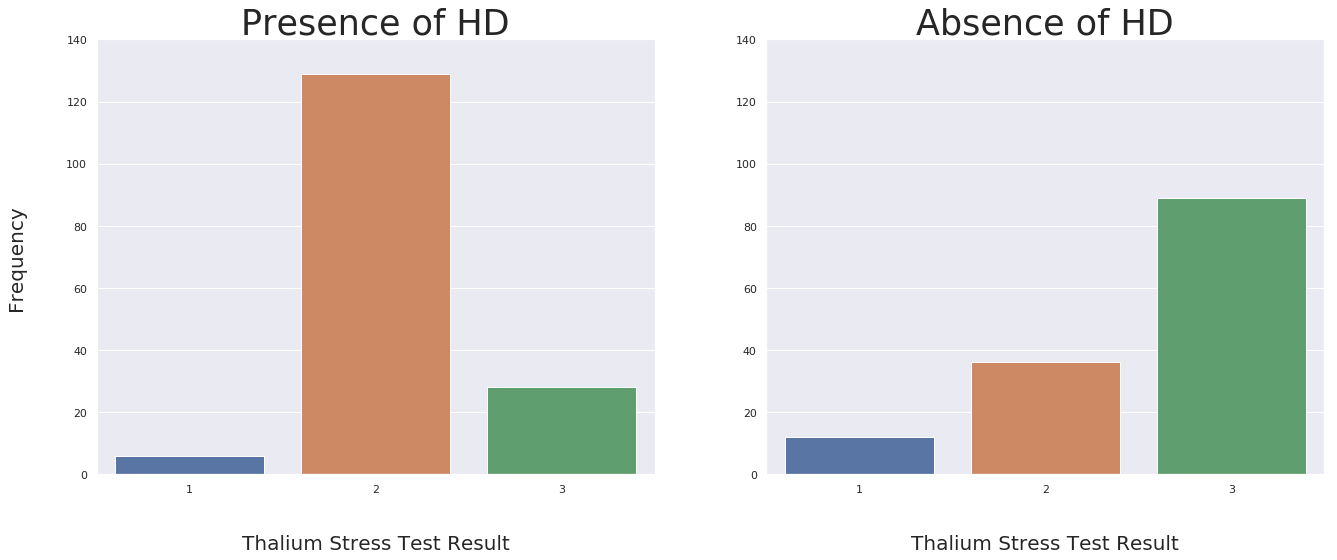

In [49]:
PHD=heart2.loc[heart2.loc[:,'target']==1]
AHD=heart2.loc[heart2.loc[:,'target']==0]
print("Most common Thalium Stress Test result in those dianosed with Heart Disease:", PHD.thal.mode())
print("Most common Thalium Stress Test result in those dianosed without Heart Disease:", AHD.thal.mode())

heartwo0=heart2.loc[heart2.loc[:,'thal']!=0]
plt.subplot(1,2,1)
plot1 = heartwo0[heartwo0.target == 1]
ax1 = sns.countplot(plot1['thal'])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Thalium Stress Test Result", labelpad=40, size=20)
plt.ylim(0, 140)

plt.subplot(1,2,2)
plot1 = heartwo0[heartwo0.target == 0]
ax1 = sns.countplot(plot1['thal'])
plt.title("Absence of HD", size=35)
plt.ylabel("    ", labelpad=40, size=20)
plt.xlabel("Thalium Stress Test Result", labelpad=40, size=20)
plt.ylim(0, 140)

So, I am going to make two changes:

1. Replace the thal value at index 48 with 2, the mode for patients with heart disease.
2. Replace the thal value at index 48 with 3, the mode for patients without heart disease.

In [50]:
heart2.loc[48, 'thal']=2.0
heart2.loc[281, 'thal']=3.0

In [51]:
heart3.loc[48, 'thal']="Normal"
heart3.loc[281, 'thal']="Reversible Defect"

Now that the DataFrame is clean, free of extreme outliers and erroneous values, let's do some exploratory data anslysis!

# <a id='#5'>5. Exploratory Data Analysis</a> 

## <a id='#5.1'>5.1. Overall Correlation Analysis</a> 

Let's examine the correlation between the different features by creating a heat map and correlation table.

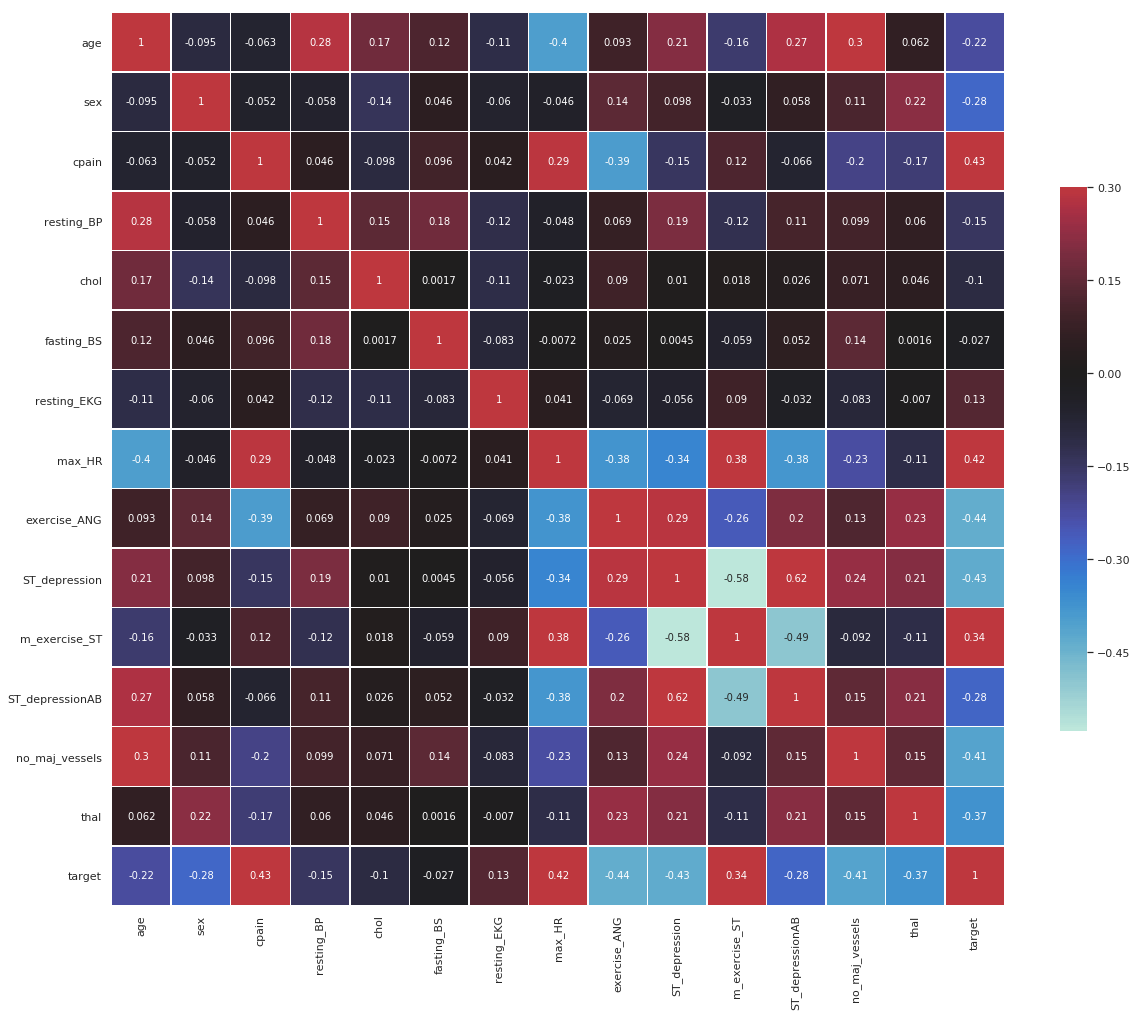

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(heart2.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.show()

In [53]:
heart2.corr()

,age,sex,cpain,resting_BP,chol,fasting_BS,resting_EKG,max_HR,exercise_ANG,ST_depression,m_exercise_ST,ST_depressionAB,no_maj_vessels,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.174869,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.271071,0.302261,0.062142,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.135116,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.058440,0.113060,0.216712,-0.283609
cpain,-0.063107,-0.051740,1.000000,0.046486,-0.097816,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.065688,-0.195356,-0.172656,0.432080
resting_BP,0.283121,-0.057647,0.046486,1.000000,0.145105,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.106105,0.099248,0.060093,-0.146269
chol,0.174869,-0.135116,-0.097816,0.145105,1.000000,0.001749,-0.108131,-0.023477,0.089834,0.010348,0.018076,0.026061,0.071139,0.045649,-0.100950
fasting_BS,0.119492,0.046022,0.096018,0.178125,0.001749,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.051692,0.144935,0.001583,-0.026826
resting_EKG,-0.111590,-0.060351,0.041561,-0.115367,-0.108131,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.032375,-0.083112,-0.007011,0.134874
max_HR,-0.395235,-0.046439,0.293367,-0.048023,-0.023477,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.379577,-0.228311,-0.111883,0.419955
exercise_ANG,0.093216,0.143460,-0.392937,0.068526,0.089834,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.197761,0.125377,0.232261,-0.435601
ST_depression,0.206040,0.098322,-0.146692,0.194600,0.010348,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.623477,0.236560,0.208399,-0.429146


Let's look more specifically at the correlations between the features and the target. 

The following dataframe is organized in descending order of the absolute value of the correlation between the feature and the target.

In [54]:
corre=heart2.corr()
TargetCorr=corre.loc[:'thal','target']
TargetCorr=pd.DataFrame(TargetCorr)
TargetCorr['AbsVal']=TargetCorr['target'].apply(lambda row: abs(row))
TargetCorr['Rank']=pd.DataFrame.rank(TargetCorr['AbsVal'])
TargetCorr['Feature']=TargetCorr.index
TargetCorr = TargetCorr.set_index('Rank') 
TargetCorr = TargetCorr.sort_index(ascending=0)
TargetCorr = TargetCorr.set_index('Feature') 
TargetCorr=TargetCorr.loc[:,'target']
TargetCorr=pd.DataFrame(TargetCorr)
TargetCorr.columns=["Correlation with Target"]
TargetCorr

,Correlation with Target
Feature,
exercise_ANG,-0.435601
cpain,0.432080
ST_depression,-0.429146
max_HR,0.419955
no_maj_vessels,-0.408992
thal,-0.367897
m_exercise_ST,0.343940
sex,-0.283609
ST_depressionAB,-0.280851


As we can see, there are strong correlations between several of the features and the target.  Let's examine some of these correlations more closely.  

Please note that this is a *basic* exploratory data analysis.  More feature correlations and, more importantly, their importance in predicting Heart Disease diagnosis, will be examined in the following sections of this study.  

## <a id='#5.2'>5.2. Feature Specific Analysis</a> 

*The following sections go in order of the highest correlation to the lowest, as determined by the .corr function*

### <a id=''>1. Exercise Induced Angina</a> 
**Correlation with Diagnosis of Heart Disease: -0.435601**

(0, 145)

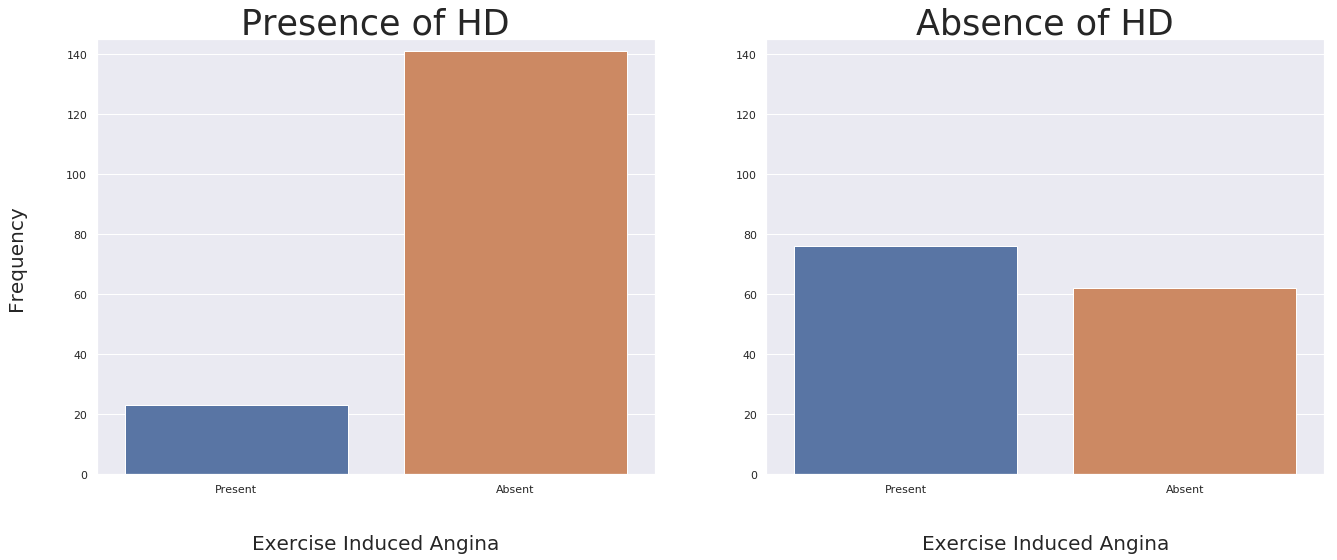

In [55]:
PHD=heart3.loc[heart3.loc[:,'target']=="Present"]
AHD=heart3.loc[heart3.loc[:,'target']=="Absent"]

plt.subplot(1,2,1)
sns.countplot(PHD['exercise_ANG'], order=["Present", "Absent"])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Exercise Induced Angina", labelpad=40, size=20)
plt.ylim(0, 145)

plt.subplot(1,2,2)
sns.countplot(AHD['exercise_ANG'], order=["Present", "Absent"])
plt.title("Absence of HD", size=35)
plt.ylabel("    ", labelpad=40, size=20)
plt.xlabel("Exercise Induced Angina", labelpad=40, size=20)
plt.ylim(0, 145)

It is clear looking at the above graph that a significantly high proportion of people diagnosed with Heart Disease in this study did *not* experience exercise induced angina.  

                  Present_HD  Absent_HD
Positive for EIA          23         77
Negative for EIA          69         31


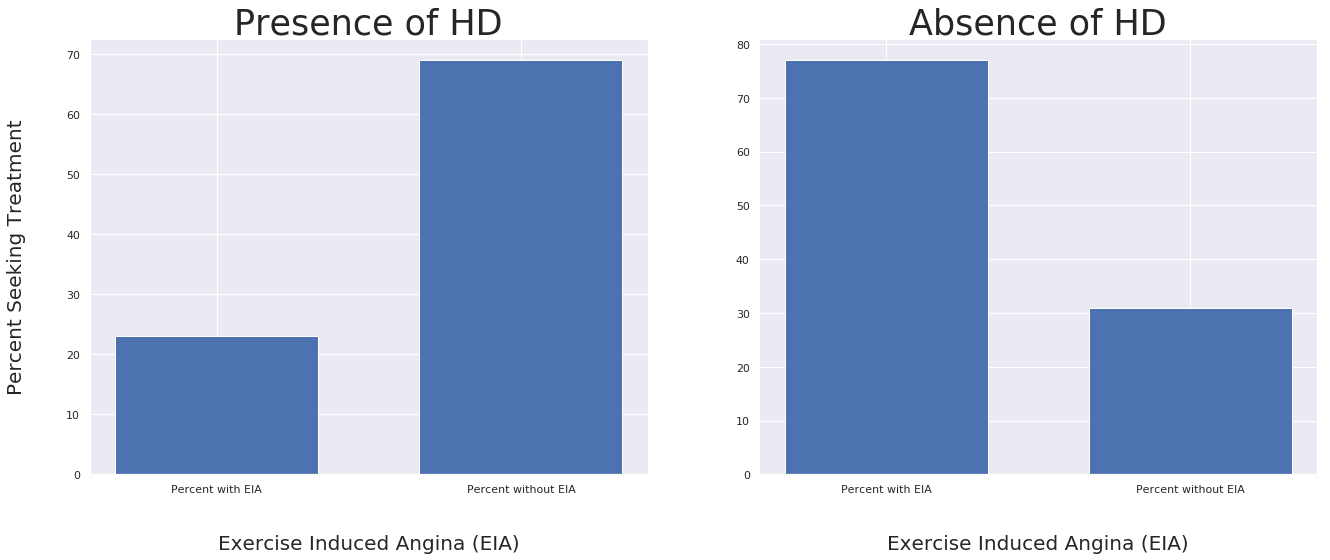

In [56]:
#EIA Present
PresentTot=heart3.loc[heart3['exercise_ANG']=="Present"].count()
PresentTot=pd.DataFrame(PresentTot)
PresentTot=PresentTot.iloc[0,0]

PresentPHD=PHD.loc[PHD['exercise_ANG']=="Present"].count()
PresentPHD=pd.DataFrame(PresentPHD)
PresentPHD=PresentPHD.iloc[0,0]

PresentAHD=AHD.loc[AHD['exercise_ANG']=="Present"].count()
PresentAHD=pd.DataFrame(PresentAHD)
PresentAHD=PresentAHD.iloc[0,0]

#EIA Absent
AbsentTot=heart3.loc[heart3['exercise_ANG']=="Absent"].count()
AbsentTot=pd.DataFrame(AbsentTot)
AbsentTot=AbsentTot.iloc[0,0]

AbsentPHD=PHD.loc[PHD['exercise_ANG']=="Absent"].count()
AbsentPHD=pd.DataFrame(AbsentPHD)
AbsentPHD=AbsentPHD.iloc[0,0]

AbsentAHD=AHD.loc[AHD['exercise_ANG']=="Absent"].count()
AbsentAHD=pd.DataFrame(AbsentAHD)
AbsentAHD=AbsentAHD.iloc[0,0]


ProPresentPHD=round(100*(PresentPHD/PresentTot))
ProPresentAHD=round(100*(PresentAHD/PresentTot))

ProAbsentPHD=round(100*(AbsentPHD/AbsentTot))
ProAbsentAHD=round(100*(AbsentAHD/AbsentTot))

plt.subplot(1,2,1)
y = [ProPresentPHD, ProAbsentPHD]
x = ["Percent with EIA", "Percent without EIA"]
width = 1/1.5
plt.bar(x, y, width)
plt.ylabel("Percent Seeking Treatment", labelpad=40, size=20)
plt.xlabel("Exercise Induced Angina (EIA)", labelpad=40, size=20)
plt.title("Presence of HD", size=35)

plt.subplot(1,2,2)
y = [ProPresentAHD, ProAbsentAHD]
x = ["Percent with EIA", "Percent without EIA"]
width = 1/1.5
plt.bar(x, y, width)
plt.xlabel("Exercise Induced Angina (EIA)", labelpad=40, size=20)
plt.title("Absence of HD", size=35)

ExAng = pd.DataFrame(columns=['Present_HD', 'Absent_HD'], index= ['Positive for EIA', 'Negative for EIA'])
ExAng.loc["Positive for EIA", "Present_HD"]=ProPresentPHD
ExAng.loc["Positive for EIA", "Absent_HD"]=ProPresentAHD
ExAng.loc["Negative for EIA", "Present_HD"]=ProAbsentPHD
ExAng.loc["Negative for EIA","Absent_HD"]=ProAbsentAHD

print(ExAng)

These graphs and tables tell us something a little different than graphs above them: the percentage of people experiencing a symptom who are diagnosed (or not diagnosed) with Heart Disease.

For example, the graphs and table above show that only 23% of people with EIA are diagnosed with Heart Disease.

Overall: 
* The presence of EIA is strongly negatively correlated with the presence of Heart Disease
    * In this study, only 23% of people who experienced an EIA were diagnosed with Heart Disease 

### <a id=''>2. Chest Pain</a> 
**Correlation with Diagnosis of Heart Disease: 0.432080**

Text(0.5, 0, 'Chest Pain Type')

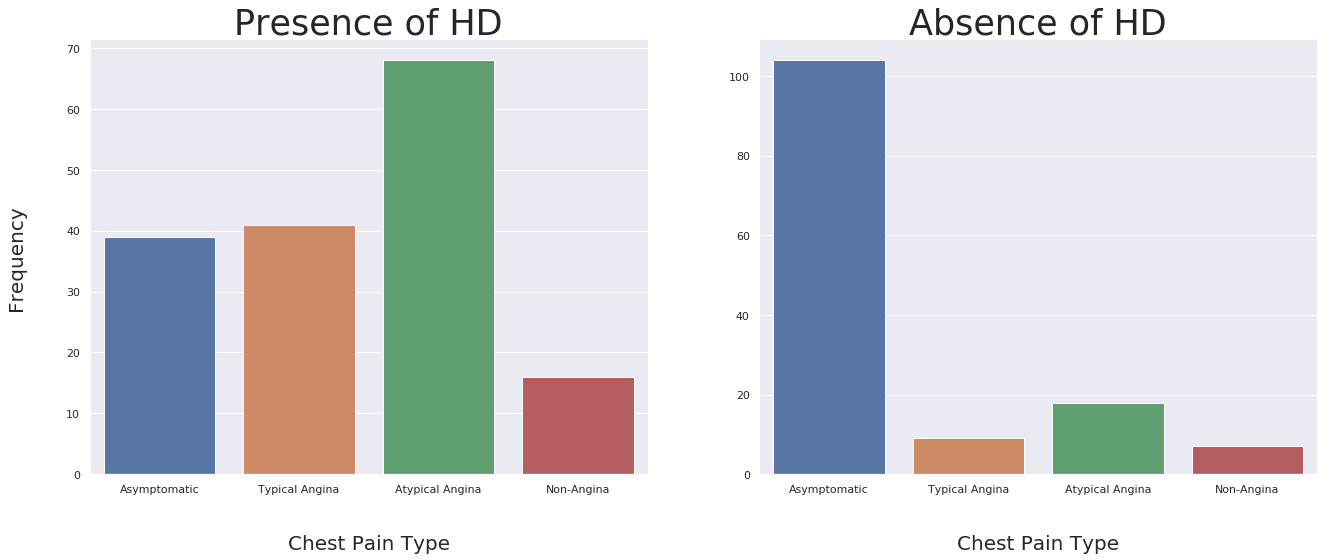

In [57]:
plt.subplot(1,2,1)
sns.countplot(PHD['cpain'], order=["Asymptomatic", "Typical Angina", "Atypical Angina","Non-Angina"])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Chest Pain Type", labelpad=40, size=20)


plt.subplot(1,2,2)
sns.countplot(AHD['cpain'], order=["Asymptomatic", "Typical Angina", "Atypical Angina", "Non-Angina"])
plt.title("Absence of HD", size=35)
plt.ylabel("    ", labelpad=40, size=20)
plt.xlabel("Chest Pain Type", labelpad=40, size=20)


                 Present_HD  Absent_HD
Asymptomatic             27         73
Typical Angina           82         18
Atypical Angina          79         21
Non-Angina               70         30


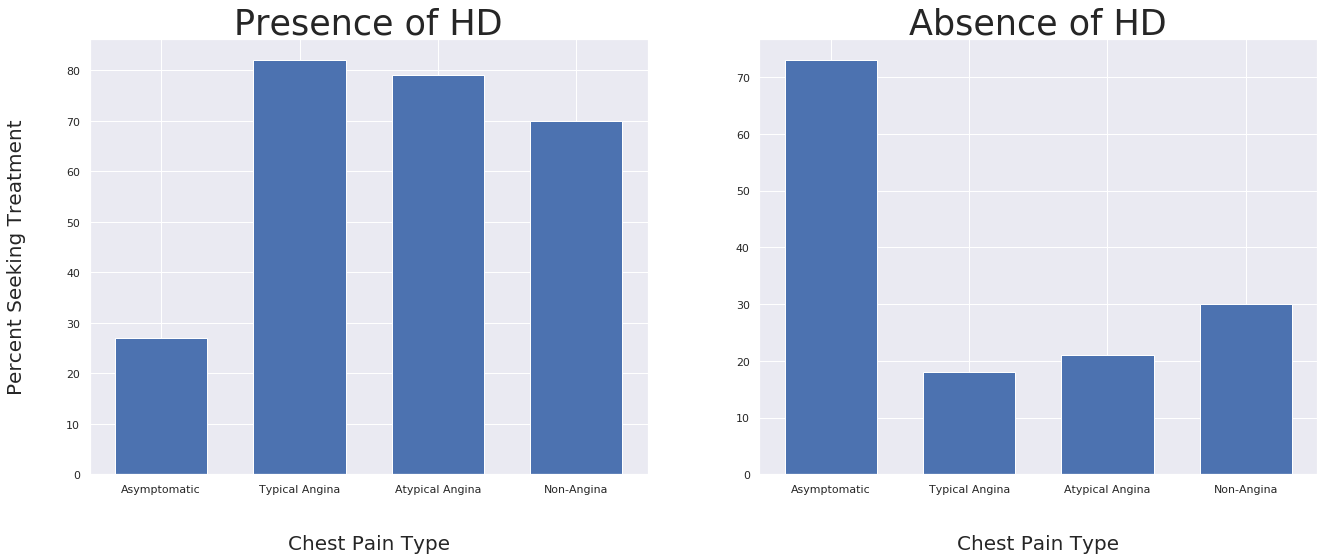

In [58]:
#Asymptomatic
AsymptomaticTot=heart3.loc[heart3['cpain']=="Asymptomatic"].count()
AsymptomaticTot=pd.DataFrame(AsymptomaticTot)
AsymptomaticTot=AsymptomaticTot.iloc[0,0]

AsymptomaticPHD=PHD.loc[PHD['cpain']=="Asymptomatic"].count()
AsymptomaticPHD=pd.DataFrame(AsymptomaticPHD)
AsymptomaticPHD=AsymptomaticPHD.iloc[0,0]

AsymptomaticAHD=AHD.loc[AHD['cpain']=="Asymptomatic"].count()
AsymptomaticAHD=pd.DataFrame(AsymptomaticAHD)
AsymptomaticAHD=AsymptomaticAHD.iloc[0,0]

ProAsymptomaticPHD=round(100*(AsymptomaticPHD/AsymptomaticTot))
ProAsymptomaticAHD=round(100*(AsymptomaticAHD/AsymptomaticTot))

#Typical Angina
TATot=heart3.loc[heart3['cpain']=="Typical Angina"].count()
TATot=pd.DataFrame(TATot)
TATot=TATot.iloc[0,0]

TAPHD=PHD.loc[PHD['cpain']=="Typical Angina"].count()
TAPHD=pd.DataFrame(TAPHD)
TAPHD=TAPHD.iloc[0,0]

TAAHD=AHD.loc[AHD['cpain']=="Typical Angina"].count()
TAAHD=pd.DataFrame(TAAHD)
TAAHD=TAAHD.iloc[0,0]

ProTAPHD=round(100*(TAPHD/TATot))
ProTAAHD=round(100*(TAAHD/TATot))

#Atypical Angina
ATATot=heart3.loc[heart3['cpain']=="Atypical Angina"].count()
ATATot=pd.DataFrame(ATATot)
ATATot=ATATot.iloc[0,0]

ATAPHD=PHD.loc[PHD['cpain']=="Atypical Angina"].count()
ATAPHD=pd.DataFrame(ATAPHD)
ATAPHD=ATAPHD.iloc[0,0]

ATAAHD=AHD.loc[AHD['cpain']=="Atypical Angina"].count()
ATAAHD=pd.DataFrame(ATAAHD)
ATAAHD=ATAAHD.iloc[0,0]

ProATAPHD=round(100*(ATAPHD/ATATot))
ProATAAHD=round(100*(ATAAHD/ATATot))

#Non-Angina
NATot=heart3.loc[heart3['cpain']=="Non-Angina"].count()
NATot=pd.DataFrame(NATot)
NATot=NATot.iloc[0,0]

NAPHD=PHD.loc[PHD['cpain']=="Non-Angina"].count()
NAPHD=pd.DataFrame(NAPHD)
NAPHD=NAPHD.iloc[0,0]

NAAHD=AHD.loc[AHD['cpain']=="Non-Angina"].count()
NAAHD=pd.DataFrame(NAAHD)
NAAHD=NAAHD.iloc[0,0]

ProNAPHD=round(100*(NAPHD/NATot))
ProNAAHD=round(100*(NAAHD/NATot))


plt.subplot(1,2,1)
y = [ProAsymptomaticPHD, ProTAPHD, ProATAPHD, ProNAPHD]
x = ["Asymptomatic", "Typical Angina", "Atypical Angina", "Non-Angina"]
width = 1/1.5
plt.bar(x, y, width)
plt.ylabel("Percent Seeking Treatment", labelpad=40, size=20)
plt.xlabel("Chest Pain Type", labelpad=40, size=20)
plt.title("Presence of HD", size=35)

plt.subplot(1,2,2)
y = [ProAsymptomaticAHD, ProTAAHD, ProATAAHD, ProNAAHD]
x = ["Asymptomatic", "Typical Angina", "Atypical Angina", "Non-Angina"]
width = 1/1.5
plt.bar(x, y, width)
plt.xlabel("Chest Pain Type", labelpad=40, size=20)
plt.title("Absence of HD", size=35)

ExAng = pd.DataFrame(columns=['Present_HD', 'Absent_HD'], index= ["Asymptomatic", "Typical Angina", "Atypical Angina", "Non-Angina"])
ExAng.loc["Asymptomatic", "Present_HD"]=ProAsymptomaticPHD
ExAng.loc["Asymptomatic", "Absent_HD"]=ProAsymptomaticAHD
ExAng.loc["Typical Angina", "Present_HD"]=ProTAPHD
ExAng.loc["Typical Angina", "Absent_HD"]=ProTAAHD
ExAng.loc["Atypical Angina", "Present_HD"]=ProATAPHD
ExAng.loc["Atypical Angina", "Absent_HD"]=ProATAAHD
ExAng.loc["Non-Angina", "Present_HD"]=ProNAPHD
ExAng.loc["Non-Angina", "Absent_HD"]=ProNAAHD

print(ExAng)

Overall:
* There is a strong negative correlation between no pain (Asymptomatic) and the diagnosis of Heart Disease
    * In this study, 73% of people who experienced no pain (Asmyptomatic) were not diagnosed with Heart Disease.
* There is a strong positive correlation between Typical Angina pain and the presence of Heart Disease
     * In this study, 82% of people who experienced Typical Angina pain were diagnosed with Heart Disease.
* There is a strong positive correlation between Non-Angina pain and the presence of Heart Disease
     * In this study, 79% of people who experienced Atypical Angina pain were diagnosed with Heart Disease.     
* There is a strong positive correlation between Atypical Angina pain and the presence of Heart Disease
    * In this study, 70% of people who experienced Non-Angina pain were diagnosed with Heart Disease.  
  
* So, overall, this study indicates there is a strong positive correlation between experiencing *any* of the pain types mentioned above and being being diagnosed with Heart Disease

### <a id=''>3. ST Depression (mm)</a> 
**Correlation with Diagnosis of Heart Disease: -0.429146**

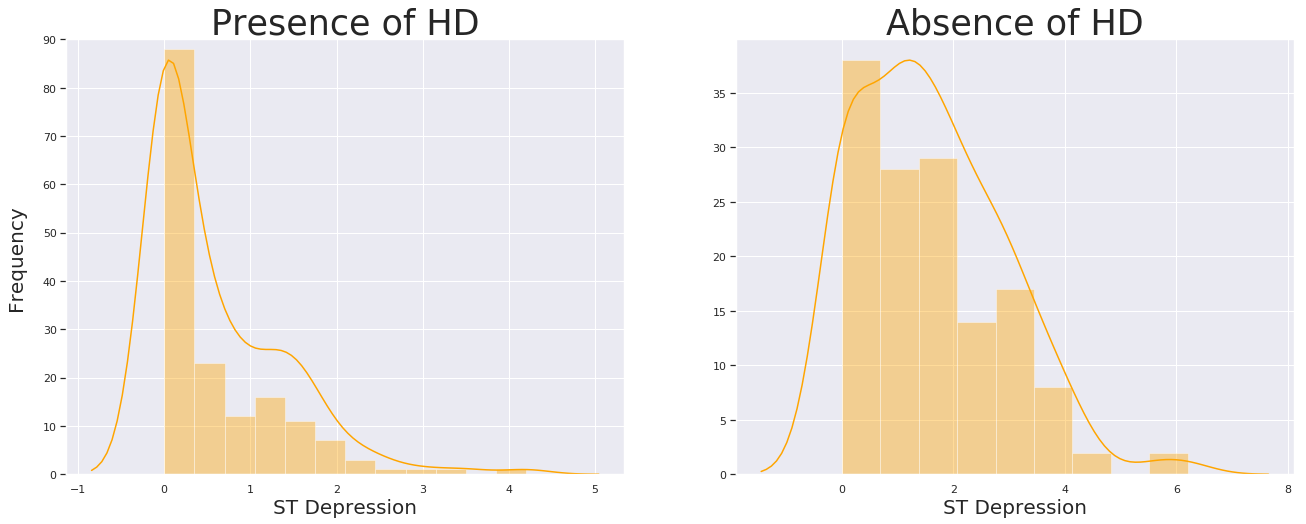

In [59]:
plt.subplot(1,2,1)
ax1 = sns.distplot(PHD['ST_depression'], kde=False, color='orange')
ax1.set_xlabel("ST Depression", fontsize=20)
plt.ylim(0,90)
second_ax1 = ax1.twinx()
second_ax1.yaxis.set_label_position("left")
sns.distplot(PHD['ST_depression'], ax=second_ax1, kde=True, hist=False, color='orange')
second_ax1.set_yticks([])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)

plt.subplot(1,2,2)
ax0 = sns.distplot(AHD['ST_depression'], kde=False, color='orange')
ax0.set_xlabel("ST Depression", fontsize=20)
second_ax0 = ax0.twinx()
sns.distplot(plot0['ST_depression'], ax=second_ax0, kde=True, hist=False, color='orange')
second_ax0.set_yticks([])
plt.title("Absence of HD", size=35)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 22
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Looking at this graph, it appears that patients with Heart Disease are more likely to have ST depression values of 0.  However, due to the nature of the graph, it may be difficult to see the relationship between abnormal/normal ST depression levels and Heart Disease.  

Let's look at the feature I engineered: 'ST_depressionAB' to get more details.

****3.1 ST Depression Abnormal v Normal****

*Correlation with Diagnosis of Heart Disease: -0.280851*

(0, 120)

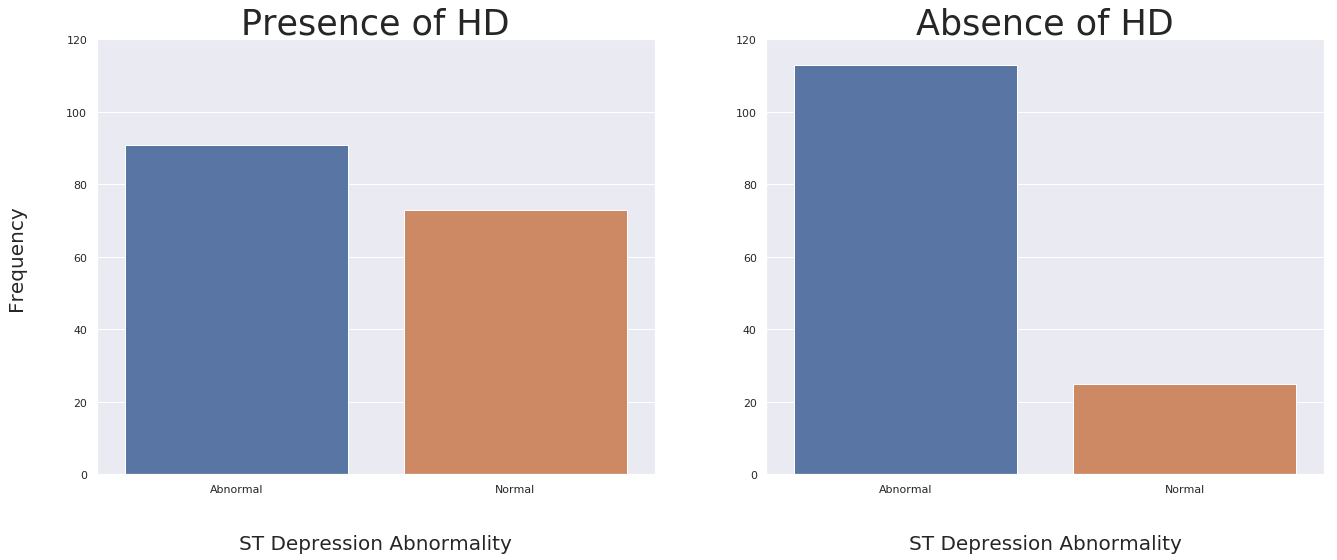

In [60]:
plt.subplot(1,2,1)
sns.countplot(PHD['ST_depressionAB'], order=["Abnormal", "Normal"])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("ST Depression Abnormality", labelpad=40, size=20)
plt.ylim(0, 120)

plt.subplot(1,2,2)
sns.countplot(AHD['ST_depressionAB'], order=["Abnormal", "Normal"])
plt.title("Absence of HD", size=35)
plt.ylabel("    ", labelpad=40, size=20)
plt.xlabel("ST Depression Abnormality", labelpad=40, size=20)
plt.ylim(0, 120)

          Present_HD  Absent_HD
Abnormal          55         55
Normal            74         26


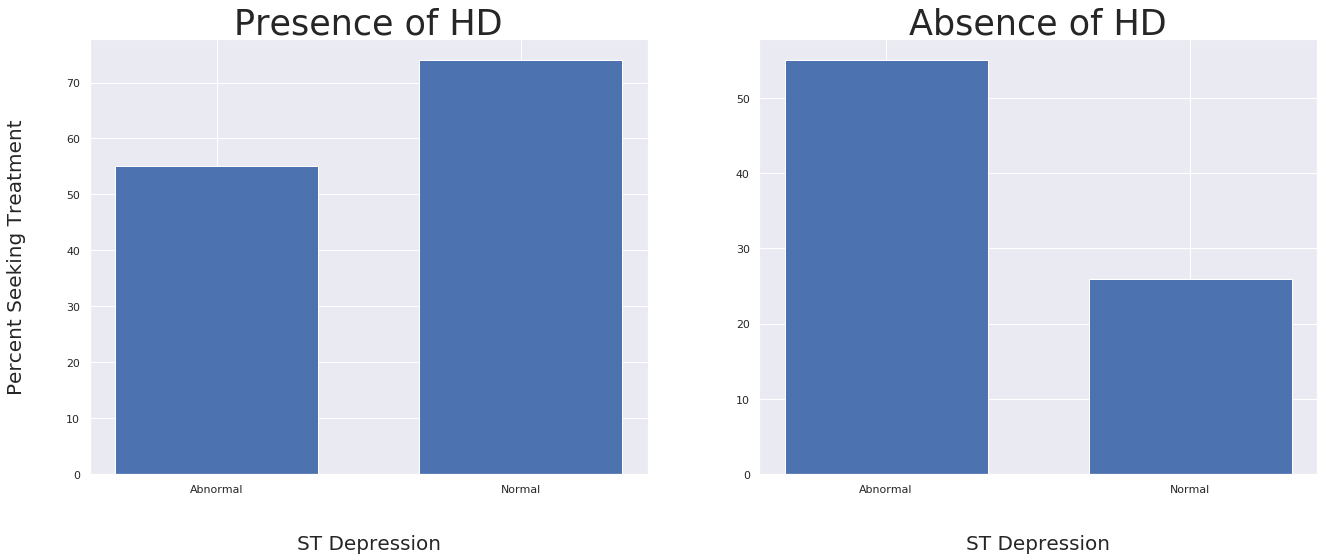

In [61]:
#Abnormal
ATot=heart3.loc[heart3['ST_depressionAB']=="Abnormal"].count()
ATot=pd.DataFrame(ATot)
ATot=ATot.iloc[0,0]

APHD=AHD.loc[AHD['ST_depressionAB']=="Abnormal"].count()
APHD=pd.DataFrame(APHD)
APHD=APHD.iloc[0,0]

AAHD=AHD.loc[AHD['ST_depressionAB']=="Abnormal"].count()
AAHD=pd.DataFrame(AAHD)
AAHD=AAHD.iloc[0,0]

ProAAHD=round(100*(AAHD/ATot))
ProAPHD=round(100*(APHD/ATot))

#Normal
NTot=heart3.loc[heart3['ST_depressionAB']=="Normal"].count()
NTot=pd.DataFrame(NTot)
NTot=NTot.iloc[0,0]

NPHD=PHD.loc[PHD['ST_depressionAB']=="Normal"].count()
NPHD=pd.DataFrame(NPHD)
NPHD=NPHD.iloc[0,0]

NAHD=AHD.loc[AHD['ST_depressionAB']=="Normal"].count()
NAHD=pd.DataFrame(NAHD)
NAHD=NAHD.iloc[0,0]

ProNAHD=round(100*(NAHD/NTot))
ProNPHD=round(100*(NPHD/NTot))

plt.subplot(1,2,1)
y = [ProAPHD, ProNPHD]
x = ["Abnormal", "Normal"]
width = 1/1.5
plt.bar(x, y, width)
plt.ylabel("Percent Seeking Treatment", labelpad=40, size=20)
plt.xlabel("ST Depression", labelpad=40, size=20)
plt.title("Presence of HD", size=35)

plt.subplot(1,2,2)
y = [ProAAHD, ProNAHD]
x = ["Abnormal", "Normal"]
width = 1/1.5
plt.bar(x, y, width)
plt.xlabel("ST Depression", labelpad=40, size=20)
plt.title("Absence of HD", size=35)

STN = pd.DataFrame(columns=['Present_HD', 'Absent_HD'], index= ["Abnormal", "Normal"])
STN.loc["Abnormal", "Present_HD"]=ProAPHD
STN.loc["Abnormal", "Absent_HD"]=ProAAHD
STN.loc["Normal", "Present_HD"]=ProNPHD
STN.loc["Normal", "Absent_HD"]=ProNAHD

print(STN)

Overall:
* There is a small positive correlation between the Normal ST (0) ST Depressions and a diagnosis of Heart Disease.
* It is interesting, and seems counter-intuitiave, that in this study 74% of people who had a *normal* (0 value) ST Depression were diagnosed with Heart Disease.

### <a id=''>4. Maximum Heart Rate</a> 
**Correlation with Diagnosis of Heart Disease: 0.419955 **

(65, 210)

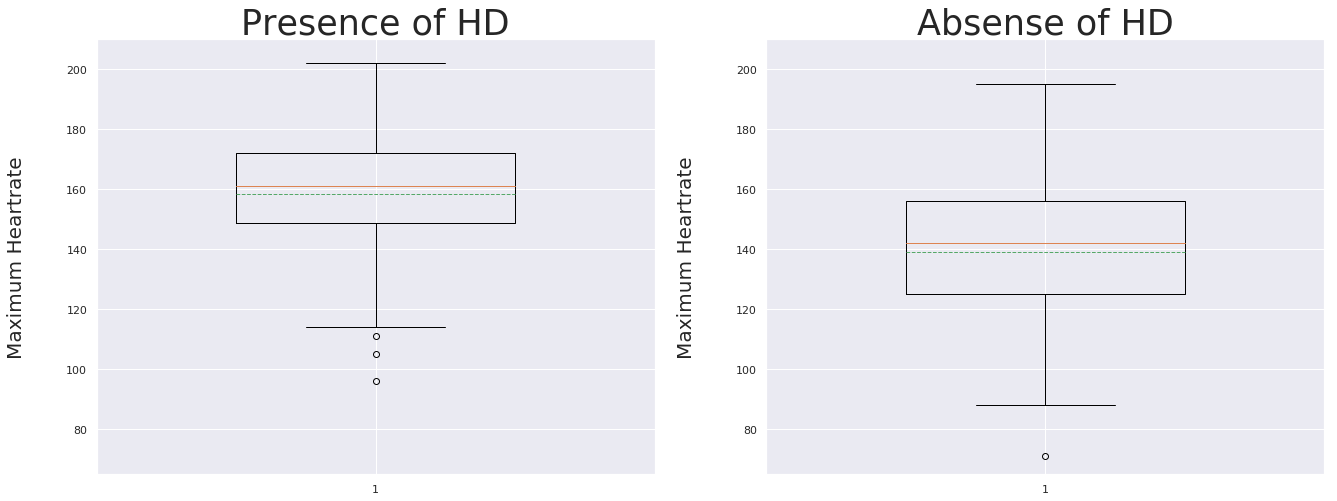

In [62]:
plt.subplot(1,2,1)
matplotlib.pyplot.boxplot(PHD['max_HR'], widths=0.5, meanline=True, showmeans=True)
plt.title("Presence of HD", size=35)
plt.ylabel("Maximum Heartrate", labelpad=40, size=20)
plt.ylim(65, 210)


plt.subplot(1,2,2)
matplotlib.pyplot.boxplot(AHD['max_HR'], widths=0.5, meanline=True, showmeans=True)
plt.title("Absense of HD", size=35)
plt.ylabel("Maximum Heartrate", labelpad=40, size=20)
plt.ylim(65, 210)

In [ ]:
print("Interquartile range for patients with HD:", np.percentile(PHD['max_HR'], 75) - np.percentile(PHD['max_HR'], 25))
print("Interquartile range for patients without HD:",np.percentile(AHD['max_HR'], 75) - np.percentile(AHD['max_HR'], 25))
print("23.25/31.0 =", 23.25/31.0)

Overall:
* There is a strong positive correlation between (increased) maximum heartrate and diagnosis of Heart Disease
    * The mean, median, first quantile, and third quartile are higher for patients diagnosed with HD, compared to those not diagnosed.
    * The interquartile range (IR) of patients not diagnosed with heart disease is 25% larger than the IR of patients diagnosed with IR.  However, this difference is not drastic.  

### <a id=''>5. Number of Major Vessels Colored by Fluoroscopy </a> 
**Correlation with Diagnosis of Heart Disease: 0.419955 **

Text(0.5, 0, 'Number of Major Vessels Colored by Fluoroscopy')

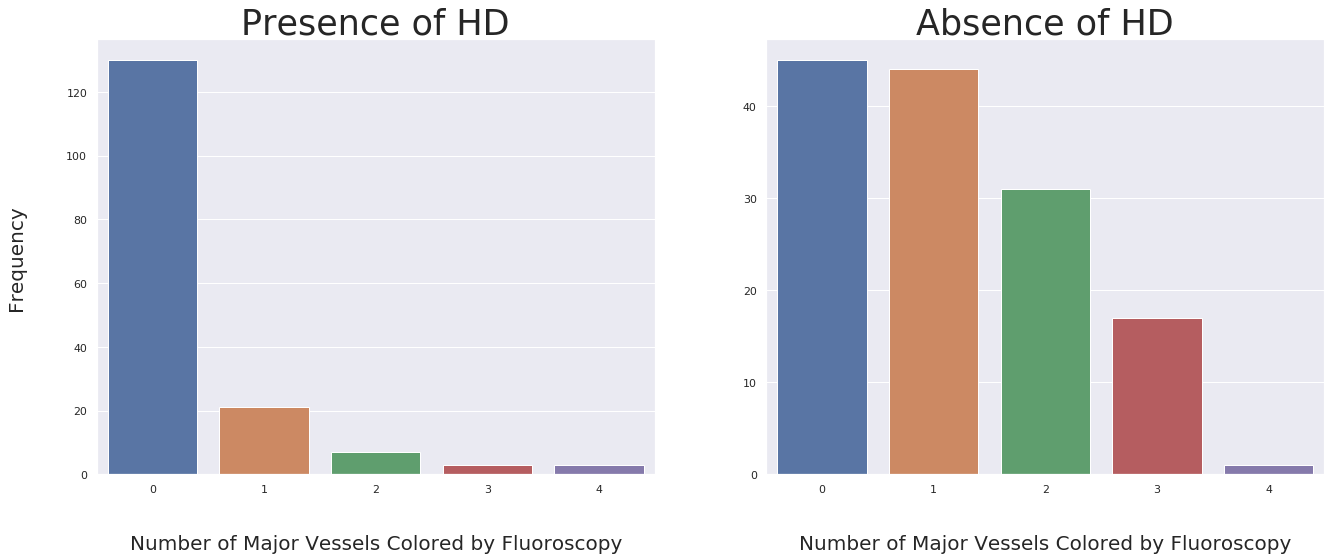

In [63]:
plt.subplot(1,2,1)
sns.countplot(PHD['no_maj_vessels'], order=[0, 1, 2,3,4])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Number of Major Vessels Colored by Fluoroscopy", labelpad=40, size=20)


plt.subplot(1,2,2)
sns.countplot(AHD['no_maj_vessels'],order=[0, 1, 2,3,4])
plt.title("Absence of HD", size=35)
plt.ylabel("    ", labelpad=40, size=20)
plt.xlabel("Number of Major Vessels Colored by Fluoroscopy", labelpad=40, size=20)


   Present_HD  Absent_HD
0          74         26
1          32         68
2          18         82
3          15         85
4          75         25


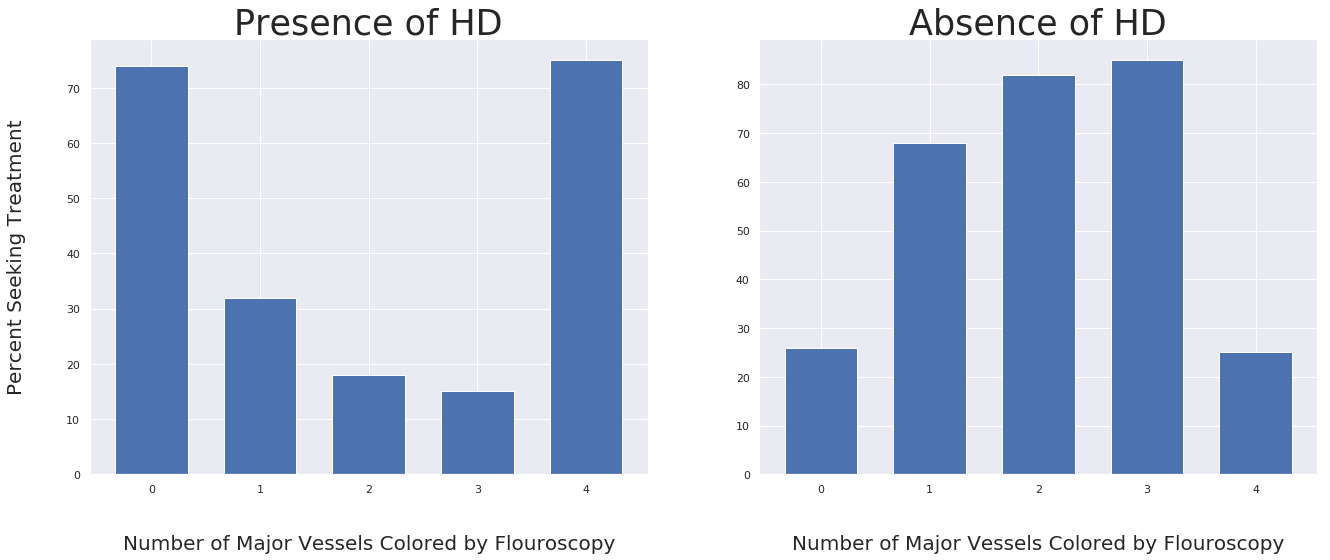

In [64]:
#0
Tot0=heart3.loc[heart3['no_maj_vessels']==0].count()
Tot0=pd.DataFrame(Tot0)
Tot0=Tot0.iloc[0,0]

PHD0=PHD.loc[PHD['no_maj_vessels']==0].count()
PHD0=pd.DataFrame(PHD0)
PHD0=PHD0.iloc[0,0]

AHD0=AHD.loc[AHD['no_maj_vessels']==0].count()
AHD0=pd.DataFrame(AHD0)
AHD0=AHD0.iloc[0,0]

ProPHD0=round(100*(PHD0/Tot0))
ProAHD0=round(100*(AHD0/Tot0))

#1
Tot1=heart3.loc[heart3['no_maj_vessels']==1].count()
Tot1=pd.DataFrame(Tot1)
Tot1=Tot1.iloc[0,0]

PHD1=PHD.loc[PHD['no_maj_vessels']==1].count()
PHD1=pd.DataFrame(PHD1)
PHD1=PHD1.iloc[0,0]

AHD1=AHD.loc[AHD['no_maj_vessels']==1].count()
AHD1=pd.DataFrame(AHD1)
AHD1=AHD1.iloc[0,0]

ProPHD1=round(100*(PHD1/Tot1))
ProAHD1=round(100*(AHD1/Tot1))

#2
Tot2=heart3.loc[heart3['no_maj_vessels']==2].count()
Tot2=pd.DataFrame(Tot2)
Tot2=Tot2.iloc[0,0]

PHD2=PHD.loc[PHD['no_maj_vessels']==2].count()
PHD2=pd.DataFrame(PHD2)
PHD2=PHD2.iloc[0,0]

AHD2=AHD.loc[AHD['no_maj_vessels']==2].count()
AHD2=pd.DataFrame(AHD2)
AHD2=AHD2.iloc[0,0]

ProPHD2=round(100*(PHD2/Tot2))
ProAHD2=round(100*(AHD2/Tot2))

#3
Tot3=heart3.loc[heart3['no_maj_vessels']==3].count()
Tot3=pd.DataFrame(Tot3)
Tot3=Tot3.iloc[0,0]

PHD3=PHD.loc[PHD['no_maj_vessels']==3].count()
PHD3=pd.DataFrame(PHD3)
PHD3=PHD3.iloc[0,0]

AHD3=AHD.loc[AHD['no_maj_vessels']==3].count()
AHD3=pd.DataFrame(AHD3)
AHD3=AHD3.iloc[0,0]

ProPHD3=round(100*(PHD3/Tot3))
ProAHD3=round(100*(AHD3/Tot3))

#4
Tot4=heart3.loc[heart3['no_maj_vessels']==4].count()
Tot4=pd.DataFrame(Tot4)
Tot4=Tot4.iloc[0,0]

PHD4=PHD.loc[PHD['no_maj_vessels']==4].count()
PHD4=pd.DataFrame(PHD4)
PHD4=PHD4.iloc[0,0]

AHD4=AHD.loc[AHD['no_maj_vessels']==4].count()
AHD4=pd.DataFrame(AHD4)
AHD4=AHD4.iloc[0,0]

ProPHD4=round(100*(PHD4/Tot4))
ProAHD4=round(100*(AHD4/Tot4))


plt.subplot(1,2,1)
y = [ProPHD0, ProPHD1, ProPHD2, ProPHD3, ProPHD4]
x = ["0", "1", "2", "3", "4"]
width = 1/1.5
plt.bar(x, y, width)
plt.ylabel("Percent Seeking Treatment", labelpad=40, size=20)
plt.xlabel("Number of Major Vessels Colored by Flouroscopy", labelpad=40, size=20)
plt.title("Presence of HD", size=35)

plt.subplot(1,2,2)
y = [ProAHD0, ProAHD1, ProAHD2, ProAHD3, ProAHD4]
x = ["0", "1", "2", "3", "4"]
width = 1/1.5
plt.bar(x, y, width)
plt.xlabel("Number of Major Vessels Colored by Flouroscopy", labelpad=40, size=20)
plt.title("Absence of HD", size=35)

NMV = pd.DataFrame(columns=['Present_HD', 'Absent_HD'], index= ["0", "1", "2", "3", "4"])
NMV.loc["0", "Present_HD"]=ProPHD0
NMV.loc["0", "Absent_HD"]=ProAHD0
NMV.loc["1", "Present_HD"]=ProPHD1
NMV.loc["1", "Absent_HD"]=ProAHD1
NMV.loc["2", "Present_HD"]=ProPHD2
NMV.loc["2", "Absent_HD"]=ProAHD2
NMV.loc["3", "Present_HD"]=ProPHD3
NMV.loc["3", "Absent_HD"]=ProAHD3
NMV.loc["4", "Present_HD"]=ProPHD4
NMV.loc["4", "Absent_HD"]=ProAHD4

print(NMV)

Overall: 
* There is a strong positive correlation between heartrate and diagnosis of Heart Disease
* A large percentage of patients who have no major vessels colored by flouroscopy are diagnosed with Heart Disease
* As the number of major vessels colored by flouroscopy increases, the percentage of patients diagnosed with Heart disease decreases.  
    * The one exception to this is the 4 cases in which 4 major vessels were colored.  Specifically, 75% of the patients with 4 colored major vessels had Hear Disease.  As there are 303 patients in the database, however, this exception is unlikely to make a large difference in the machiene learning process.


### <a id=''>6. Thalium Stress Test Result </a> 
**Correlation with Diagnosis of Heart Disease: -0.367897**

(0, 135)

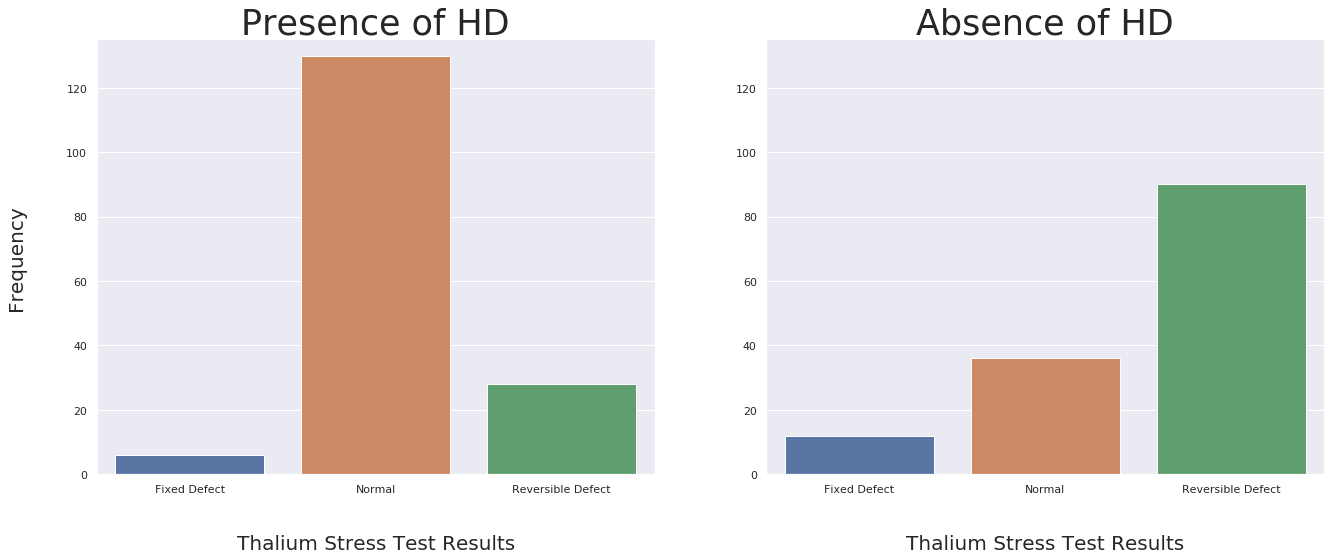

In [65]:
plt.subplot(1,2,1)
sns.countplot(PHD['thal'], order=["Fixed Defect", "Normal", "Reversible Defect"])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Thalium Stress Test Results", labelpad=40, size=20)
plt.ylim(0, 135)

plt.subplot(1,2,2)
sns.countplot(AHD['thal'], order=["Fixed Defect", "Normal", "Reversible Defect"])
plt.title("Absence of HD", size=35)
plt.ylabel("    ", labelpad=40, size=20)
plt.xlabel("Thalium Stress Test Results", labelpad=40, size=20)
plt.ylim(0, 135)

                   Present_HD  Absent_HD
Fixed Defect               33         67
Normal                     78         22
Reversible Defect          24         76


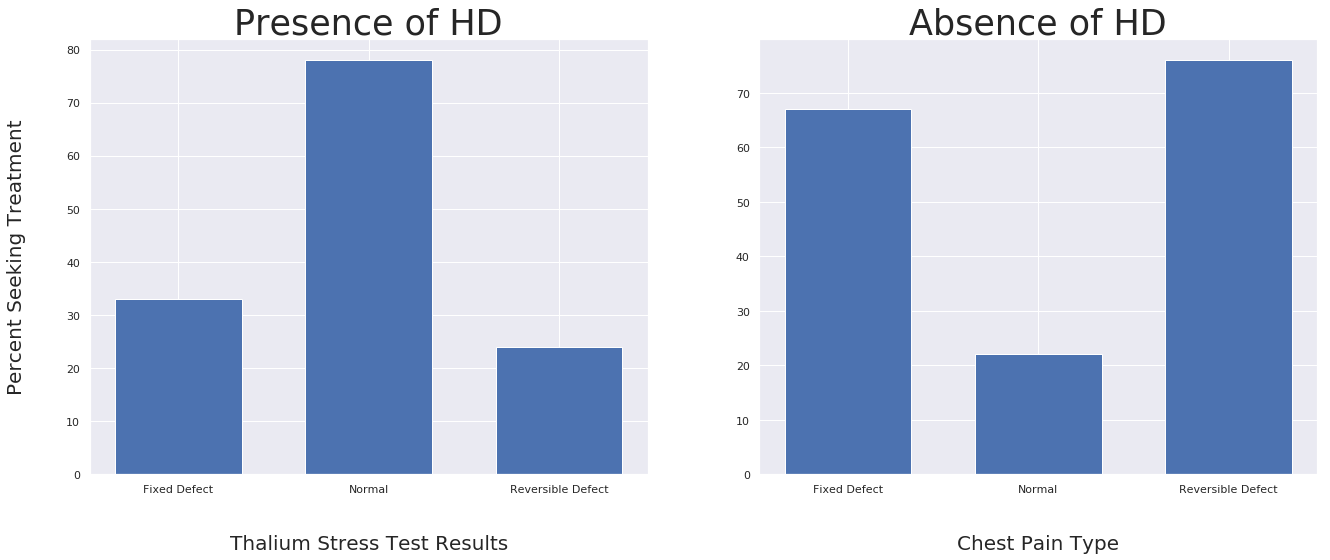

In [66]:
#Fixed Defect
FDTot=heart3.loc[heart3['thal']=="Fixed Defect"].count()
FDTot=pd.DataFrame(FDTot)
FDTot=FDTot.iloc[0,0]

FDPHD=PHD.loc[PHD['thal']=="Fixed Defect"].count()
FDPHD=pd.DataFrame(FDPHD)
FDPHD=FDPHD.iloc[0,0]

FDAHD=AHD.loc[AHD['thal']=="Fixed Defect"].count()
FDAHD=pd.DataFrame(FDAHD)
FDAHD=FDAHD.iloc[0,0]

ProFDAHD=round(100*(FDAHD/FDTot))
ProFDPHD=round(100*(FDPHD/FDTot))

#Normal
NTot=heart3.loc[heart3['thal']=="Normal"].count()
NTot=pd.DataFrame(NTot)
NTot=NTot.iloc[0,0]

NPHD=PHD.loc[PHD['thal']=="Normal"].count()
NPHD=pd.DataFrame(NPHD)
NPHD=NPHD.iloc[0,0]

NAHD=AHD.loc[AHD['thal']=="Normal"].count()
NAHD=pd.DataFrame(NAHD)
NAHD=NAHD.iloc[0,0]

ProNPHD=round(100*(NPHD/NTot))
ProNAHD=round(100*(NAHD/NTot))

#Reversible Defect
RDTot=heart3.loc[heart3['thal']=="Reversible Defect"].count()
RDTot=pd.DataFrame(RDTot)
RDTot=RDTot.iloc[0,0]

RDPHD=PHD.loc[PHD['thal']=="Reversible Defect"].count()
RDPHD=pd.DataFrame(RDPHD)
RDPHD=RDPHD.iloc[0,0]

RDAHD=AHD.loc[AHD['thal']=="Reversible Defect"].count()
RDAHD=pd.DataFrame(RDAHD)
RDAHD=RDAHD.iloc[0,0]

ProRDPHD=round(100*(RDPHD/RDTot))
ProRDAHD=round(100*(RDAHD/RDTot))

plt.subplot(1,2,1)
y = [ProFDPHD, ProNPHD, ProRDPHD]
x = ["Fixed Defect", "Normal", "Reversible Defect"]
width = 1/1.5
plt.bar(x, y, width)
plt.ylabel("Percent Seeking Treatment", labelpad=40, size=20)
plt.xlabel("Thalium Stress Test Results", labelpad=40, size=20)
plt.title("Presence of HD", size=35)

plt.subplot(1,2,2)
y = [ProFDAHD, ProNAHD, ProRDAHD]
x = ["Fixed Defect", "Normal", "Reversible Defect"]
width = 1/1.5
plt.bar(x, y, width)
plt.xlabel("Chest Pain Type", labelpad=40, size=20)
plt.title("Absence of HD", size=35)

THAL = pd.DataFrame(columns=['Present_HD', 'Absent_HD'], index= ["Fixed Defect", "Normal", "Reversible Defect"])
THAL.loc["Fixed Defect", "Present_HD"]=ProFDPHD
THAL.loc["Fixed Defect", "Absent_HD"]=ProFDAHD
THAL.loc["Normal", "Present_HD"]=ProNPHD
THAL.loc["Normal", "Absent_HD"]=ProNAHD
THAL.loc["Reversible Defect", "Present_HD"]=ProRDPHD
THAL.loc["Reversible Defect", "Absent_HD"]=ProRDAHD

print(THAL)

Overall:
* There is a positive correlation between a normal Thalium Stress Test (TST) and being diagnosed with Heart Disease. 
    * In this study, 78% of the people with a normal TST were diagnosed with Heart Disease 
* There is a negative correlation between a Fixed Defect or Reversible Defect TST and being diagnosed with Heart Disease.  
    * In this study, 67% of the people with a Fixed Defect TST were not diagnosed with Heart Disease 
    * In this study, 76% of the people with a Reversible Defect TST were not diagnosed with Heart Disease 
    
* The above results seem counter-intuitiave

### <a id=''>7. Slope of the Peak Exercise ST Segment </a> 
**Correlation with Diagnosis of Heart Disease: 0.343940**

(0, 110)

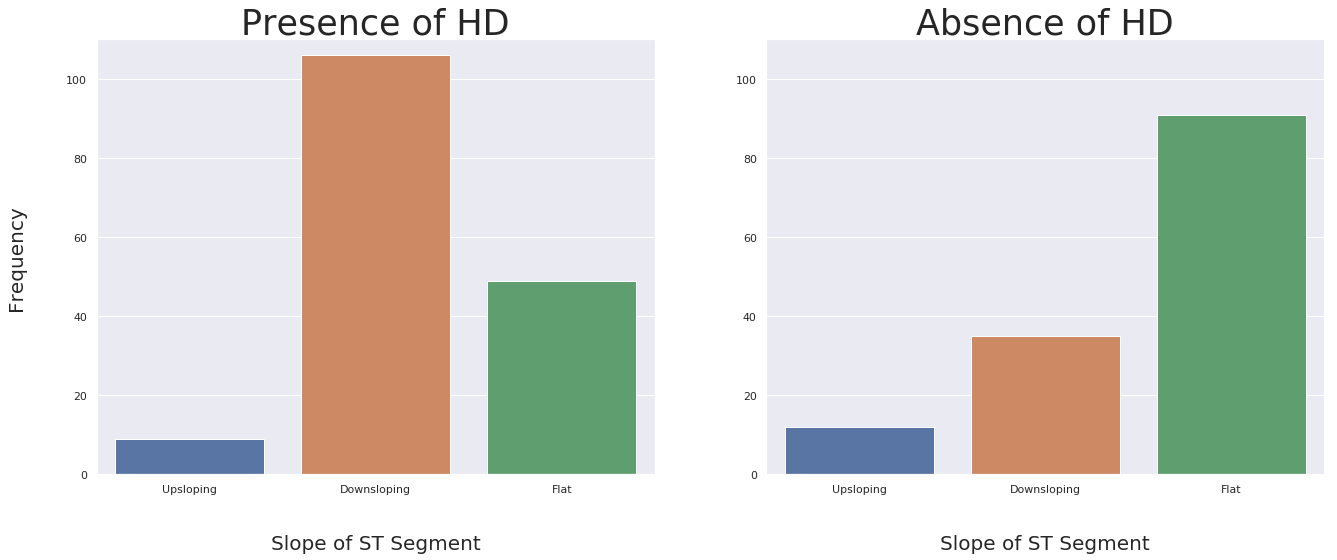

In [67]:
plt.subplot(1,2,1)
sns.countplot(PHD['m_exercise_ST'], order=["Upsloping", "Downsloping", "Flat"])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Slope of ST Segment", labelpad=40, size=20)
plt.ylim(0, 110)

plt.subplot(1,2,2)
sns.countplot(AHD['m_exercise_ST'], order=["Upsloping", "Downsloping", "Flat"])
plt.title("Absence of HD", size=35)
plt.ylabel("    ", labelpad=40, size=20)
plt.xlabel("Slope of ST Segment", labelpad=40, size=20)
plt.ylim(0, 110)

             Present_HD  Absent_HD
Upsloping            33         67
Flat                 78         22
Downsloping          24         76


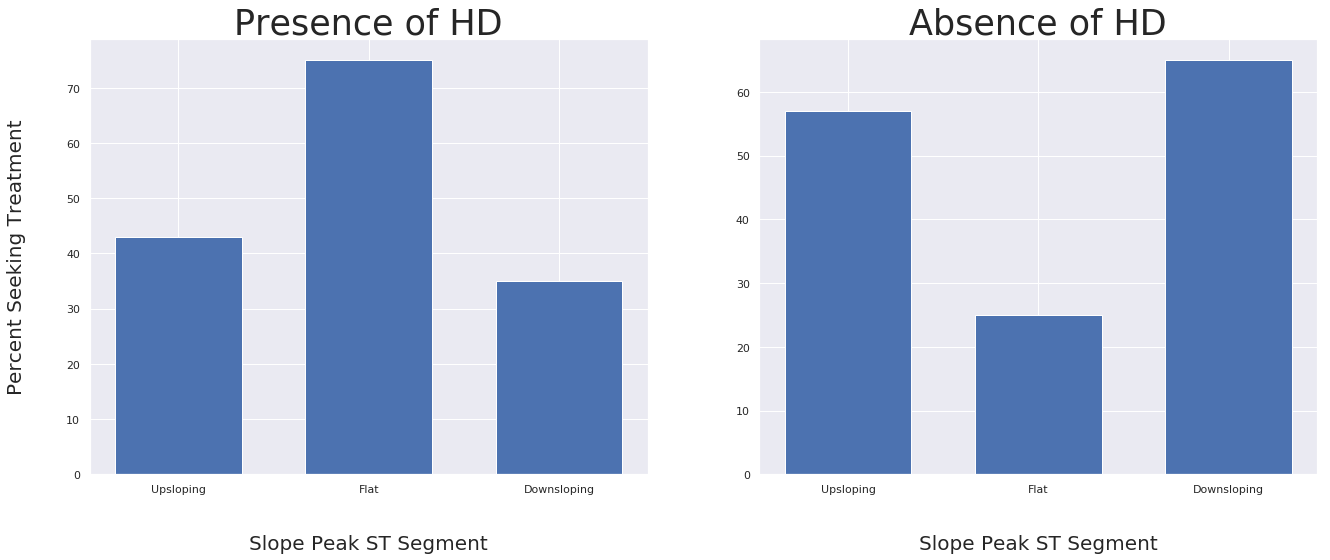

In [68]:
#Upsloping
UTot=heart3.loc[heart3['m_exercise_ST']=="Upsloping"].count()
UTot=pd.DataFrame(UTot)
UTot=UTot.iloc[0,0]

UPHD=PHD.loc[PHD['m_exercise_ST']=="Upsloping"].count()
UPHD=pd.DataFrame(UPHD)
UPHD=UPHD.iloc[0,0]

UAHD=AHD.loc[AHD['m_exercise_ST']=="Upsloping"].count()
UAHD=pd.DataFrame(UAHD)
UAHD=UAHD.iloc[0,0]

ProUAHD=round(100*(UAHD/UTot))
ProUPHD=round(100*(UPHD/UTot))

#Downsloping
DTot=heart3.loc[heart3['m_exercise_ST']=="Downsloping"].count()
DTot=pd.DataFrame(DTot)
DTot=DTot.iloc[0,0]

DPHD=PHD.loc[PHD['m_exercise_ST']=="Downsloping"].count()
DPHD=pd.DataFrame(DPHD)
DPHD=DPHD.iloc[0,0]

DAHD=AHD.loc[AHD['m_exercise_ST']=="Downsloping"].count()
DAHD=pd.DataFrame(DAHD)
DAHD=DAHD.iloc[0,0]

ProDAHD=round(100*(DAHD/DTot))
ProDPHD=round(100*(DPHD/DTot))

#Flat
FTot=heart3.loc[heart3['m_exercise_ST']=="Flat"].count()
FTot=pd.DataFrame(FTot)
FTot=FTot.iloc[0,0]

FPHD=PHD.loc[PHD['m_exercise_ST']=="Flat"].count()
FPHD=pd.DataFrame(FPHD)
FPHD=FPHD.iloc[0,0]

FAHD=AHD.loc[AHD['m_exercise_ST']=="Flat"].count()
FAHD=pd.DataFrame(FAHD)
FAHD=FAHD.iloc[0,0]

ProFAHD=round(100*(FAHD/FTot))
ProFPHD=round(100*(FPHD/FTot))

plt.subplot(1,2,1)
y = [ProUPHD, ProDPHD, ProFPHD]
x = ["Upsloping", "Flat", "Downsloping"]
width = 1/1.5
plt.bar(x, y, width)
plt.ylabel("Percent Seeking Treatment", labelpad=40, size=20)
plt.xlabel("Slope Peak ST Segment", labelpad=40, size=20)
plt.title("Presence of HD", size=35)

plt.subplot(1,2,2)
y = [ProUAHD, ProDAHD, ProFAHD]
x = ["Upsloping", "Flat", "Downsloping"]
width = 1/1.5
plt.bar(x, y, width)
plt.xlabel("Slope Peak ST Segment", labelpad=40, size=20)
plt.title("Absence of HD", size=35)

PST = pd.DataFrame(columns=['Present_HD', 'Absent_HD'], index= ["Upsloping", "Flat", "Downsloping"])
PST.loc["Upsloping", "Present_HD"]=ProFDPHD
PST.loc["Upsloping", "Absent_HD"]=ProFDAHD
PST.loc["Flat", "Present_HD"]=ProNPHD
PST.loc["Flat", "Absent_HD"]=ProNAHD
PST.loc["Downsloping", "Present_HD"]=ProRDPHD
PST.loc["Downsloping", "Absent_HD"]=ProRDAHD

print(PST)

Overall
* There is a positive correlation between a Flat Peak ST Segment and being diagnosed with Heart Disease.  
    * In this study, 80% of the people with a Flat Peak ST Segment were diagnosed with Heart Disease 
* There is a negative correlation between a Upsloping Peak ST Segment and being diagnosed with Heart Disease. 
    *  In this study, 67% of the people with a Upsloping Peak ST Segment were diagnosed with Heart Disease 
* There is a negative correlation between a Downsloping Peak ST Segment and being diagnosed with Heart Disease. 
    *  In this study, 76% of the people with a Downsloping Peak ST Segment were diagnosed with Heart Disease 

### <a id=''>8. Provider-Identified Gender</a> 
**Correlation with Diagnosis of Heart Disease: -0.283609**

(0, 120)

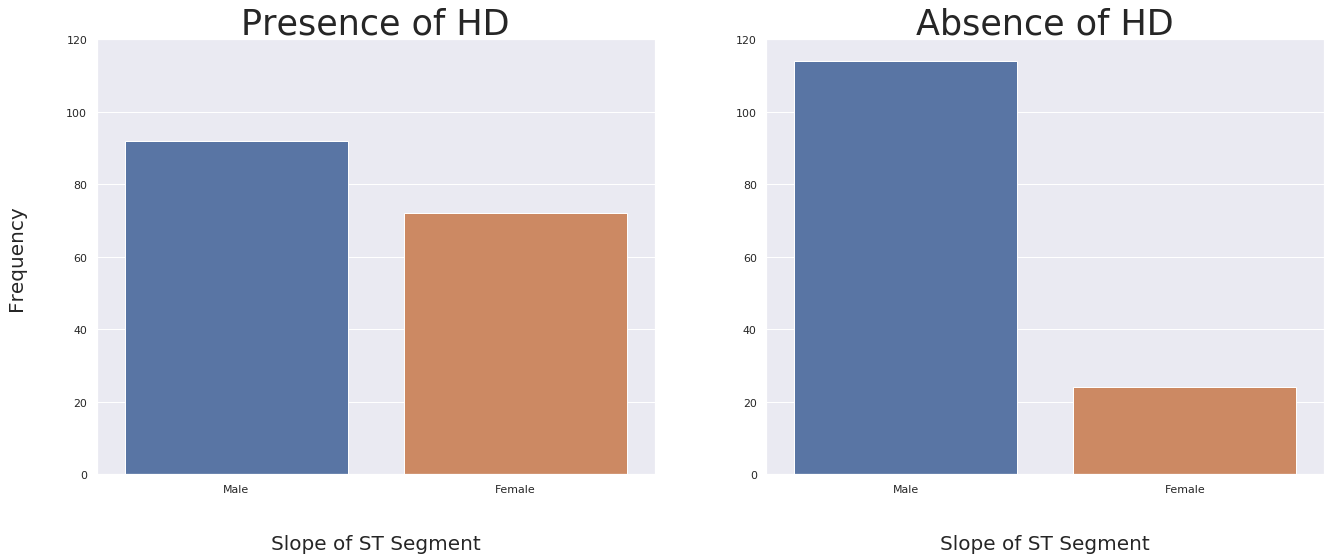

In [69]:
plt.subplot(1,2,1)
sns.countplot(PHD['sex'], order=["Male", "Female"])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Slope of ST Segment", labelpad=40, size=20)
plt.ylim(0, 120)

plt.subplot(1,2,2)
sns.countplot(AHD['sex'], order=["Male", "Female"])
plt.title("Absence of HD", size=35)
plt.ylabel("    ", labelpad=40, size=20)
plt.xlabel("Slope of ST Segment", labelpad=40, size=20)
plt.ylim(0, 120)

It appears that less females were both diagnosed and not diagnosed with Heart Disease.  However, it is important to remember that less females were included in the study compared to males.  Let's look at the number of males and females diagnosed (and not diagnosed) as their proportions of the whole.

        Present_HD  Absent_HD
Male            45         55
Female          75         25


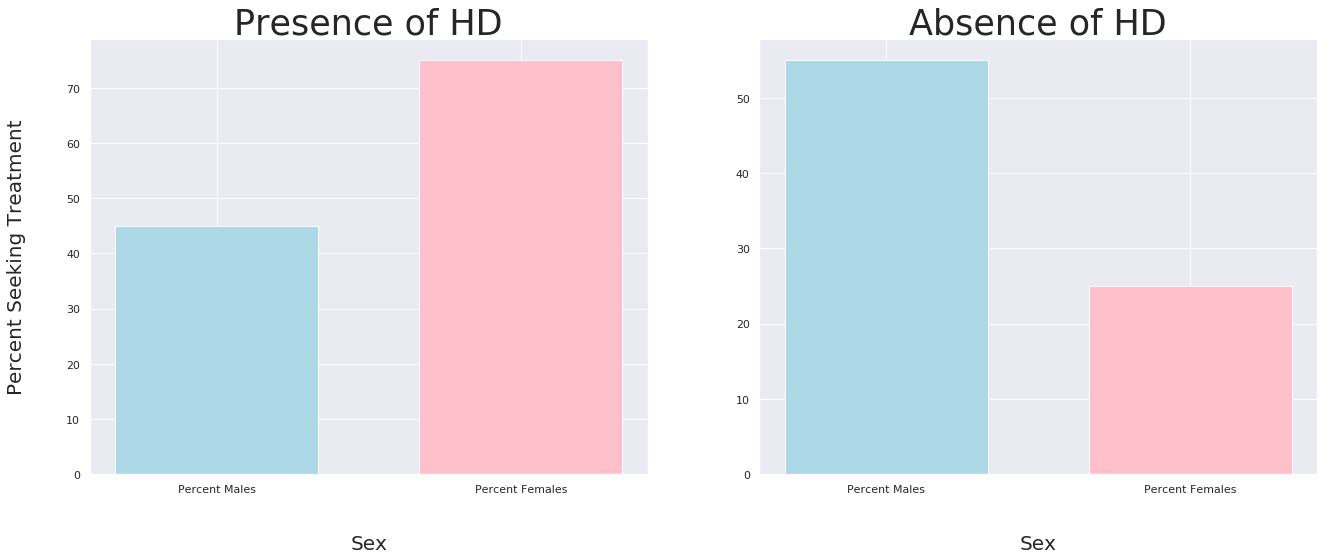

In [70]:
#Male
MaleTot=heart3.loc[heart3['sex']=="Male"].count()
MaleTot=pd.DataFrame(MaleTot)
MaleTot=MaleTot.iloc[0,0]

MalePHD=PHD.loc[PHD['sex']=="Male"].count()
MalePHD=pd.DataFrame(MalePHD)
MalePHD=MalePHD.iloc[0,0]

MaleAHD=AHD.loc[AHD['sex']=="Male"].count()
MaleAHD=pd.DataFrame(MaleAHD)
MaleAHD=MaleAHD.iloc[0,0]

ProMalePHD=round(100*(MalePHD/MaleTot))
ProMaleAHD=round(100*(MaleAHD/MaleTot))

#Female
FemaleTot=heart3.loc[heart3['sex']=="Female"].count()
FemaleTot=pd.DataFrame(FemaleTot)
FemaleTot=FemaleTot.iloc[0,0]

FemalePHD=PHD.loc[PHD['sex']=="Female"].count()
FemalePHD=pd.DataFrame(FemalePHD)
FemalePHD=FemalePHD.iloc[0,0]

FemaleAHD=AHD.loc[AHD['sex']=="Female"].count()
FemaleAHD=pd.DataFrame(FemaleAHD)
FemaleAHD=FemaleAHD.iloc[0,0]

ProFemalePHD=100*(FemalePHD/FemaleTot)
ProFemaleAHD=100*(FemaleAHD/FemaleTot)

plt.subplot(1,2,1)
y = [ProMalePHD, ProFemalePHD]
x = ["Percent Males", "Percent Females"]
width = 1/1.5
plt.bar(x, y, width, color=("lightblue", "pink"))
plt.ylabel("Percent Seeking Treatment", labelpad=40, size=20)
plt.xlabel("Sex", labelpad=40, size=20)
plt.title("Presence of HD", size=35)

plt.subplot(1,2,2)
y = [ProMaleAHD, ProFemaleAHD]
x = ["Percent Males", "Percent Females"]
width = 1/1.5
plt.bar(x, y, width, color=("lightblue", "pink"))
plt.xlabel("Sex", labelpad=40, size=20)
plt.title("Absence of HD", size=35)

MF = pd.DataFrame(columns=['Present_HD', 'Absent_HD'], index= ['Male', 'Female'])
MF.loc["Male", "Present_HD"]=ProMalePHD
MF.loc["Male", "Absent_HD"]=ProMaleAHD
MF.loc["Female", "Present_HD"]=ProFemalePHD
MF.loc["Female","Absent_HD"]=ProFemaleAHD

print(MF)

In this study, heart disease was present in 75% of the females seeking treatment, but only around 45% of males seeking treatment were diagnosed with Heart Disease!

Overall:
* There appears to be a positive correlation between the Female sex and Heart Disease diagnosis

### <a id=''>9. Age (years)</a> 
**Correlation with Diagnosis of Heart Disease: -0.221476**

(25, 80)

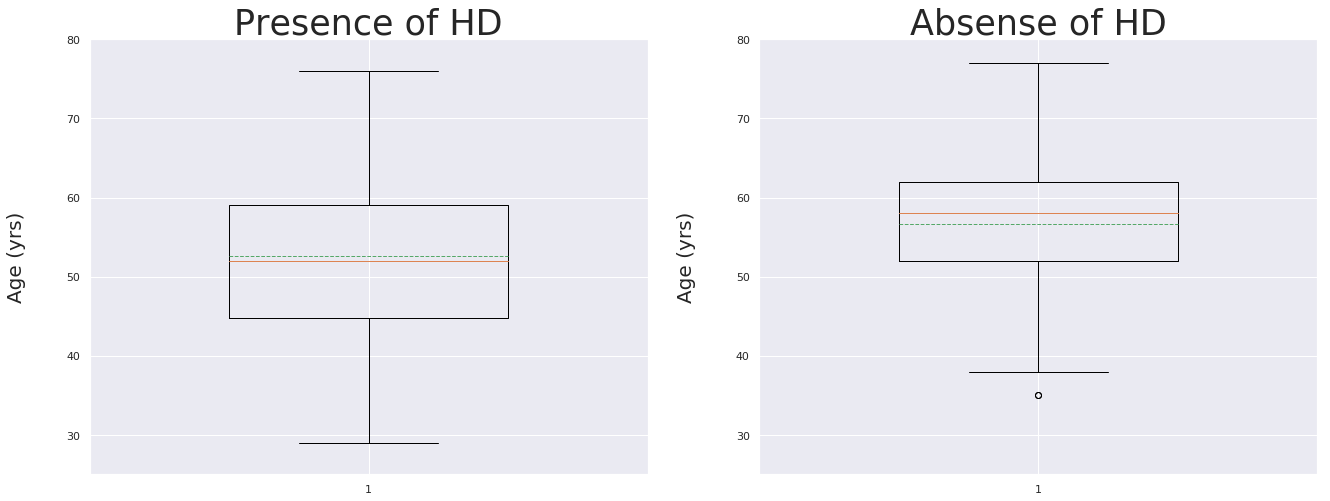

In [71]:
plt.subplot(1,2,1)
matplotlib.pyplot.boxplot(PHD['age'], widths=0.5, meanline=True, showmeans=True)
plt.title("Presence of HD", size=35)
plt.ylabel("Age (yrs)", labelpad=40, size=20)
plt.ylim(25, 80)


plt.subplot(1,2,2)
matplotlib.pyplot.boxplot(AHD['age'], widths=0.5, meanline=True, showmeans=True)
plt.title("Absense of HD", size=35)
plt.ylabel("Age (yrs)", labelpad=40, size=20)
plt.ylim(25, 80)

In [73]:
print("Interquartile range for patients with HD:", np.percentile(PHD['age'], 75) - np.percentile(PHD['age'], 25))
print("Interquartile range for patients without HD:",np.percentile(AHD['age'], 75) - np.percentile(AHD['age'], 25))

Interquartile range for patients with HD: 14.25
Interquartile range for patients without HD: 10.0


Overall:
* There is a negative correlation between age and a diagnosis of Heart Disease
    * The mean, mode, 1st, and 3rd quantiles are lower in those diagnosed with heart disease compared to those not diagnosed.  
    * The interquartile range (IR) of those not diagnosed is about 2/3rds the size of the IR of those with Heart Disease
    


### <a id=''>10. Resting Systolic Blood Pressure (mm Hg) </a> 
**Correlation with Diagnosis of Heart Disease: -0.146269**

(90, 205)

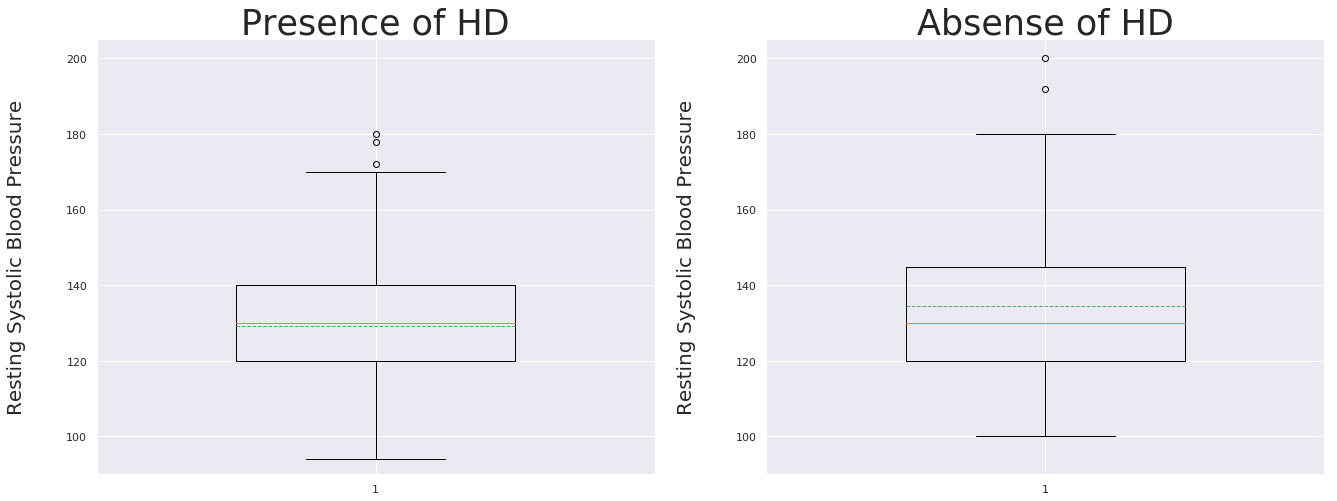

In [72]:
plt.subplot(1,2,1)
matplotlib.pyplot.boxplot(PHD['resting_BP'], widths=0.5, meanline=True, showmeans=True)
plt.title("Presence of HD", size=35)
plt.ylabel("Resting Systolic Blood Pressure", labelpad=40, size=20)
plt.ylim(90, 205)


plt.subplot(1,2,2)
matplotlib.pyplot.boxplot(AHD['resting_BP'], widths=0.5, meanline=True, showmeans=True)
plt.title("Absense of HD", size=35)
plt.ylabel("Resting Systolic Blood Pressure", labelpad=40, size=20)
plt.ylim(90, 205)

Overall:
* There is a small negative correlation between resting systolic blood pressure and a diagnosis of Heart Disease
    * The mean, mode, and 3rd quantiles are lower in those diagnosed with heart disease compared to those not diagnosed. 
    * This, however, is a low correlation rate, so it's affect on diagnosing Heart Disease is likely minimal.

### <a id=''>11. Resting EKG Categorical Results</a> 
**Correlation with Diagnosis of Heart Disease: 0.134874**

Text(0.5, 0, 'EKG Results')

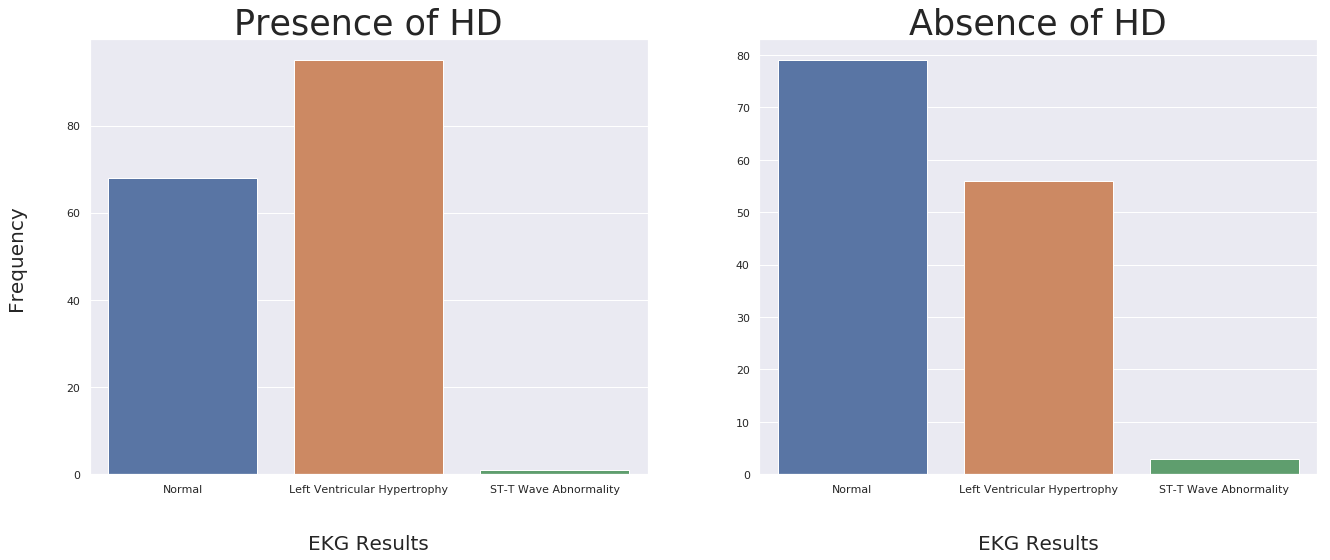

In [74]:
plt.subplot(1,2,1)
sns.countplot(PHD['resting_EKG'], order=["Normal", "Left Ventricular Hypertrophy", "ST-T Wave Abnormality"])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("EKG Results", labelpad=40, size=20)

plt.subplot(1,2,2)
sns.countplot(AHD['resting_EKG'], order=["Normal", "Left Ventricular Hypertrophy", "ST-T Wave Abnormality"])
plt.title("Absence of HD", size=35)
plt.ylabel("    ", labelpad=40, size=20)
plt.xlabel("EKG Results", labelpad=40, size=20)

                              Present_HD  Absent_HD
Normal                              46.0       54.0
Left Ventricular Hypertrophy        63.0       37.0
ST-T Wave Abnormality               25.0       75.0


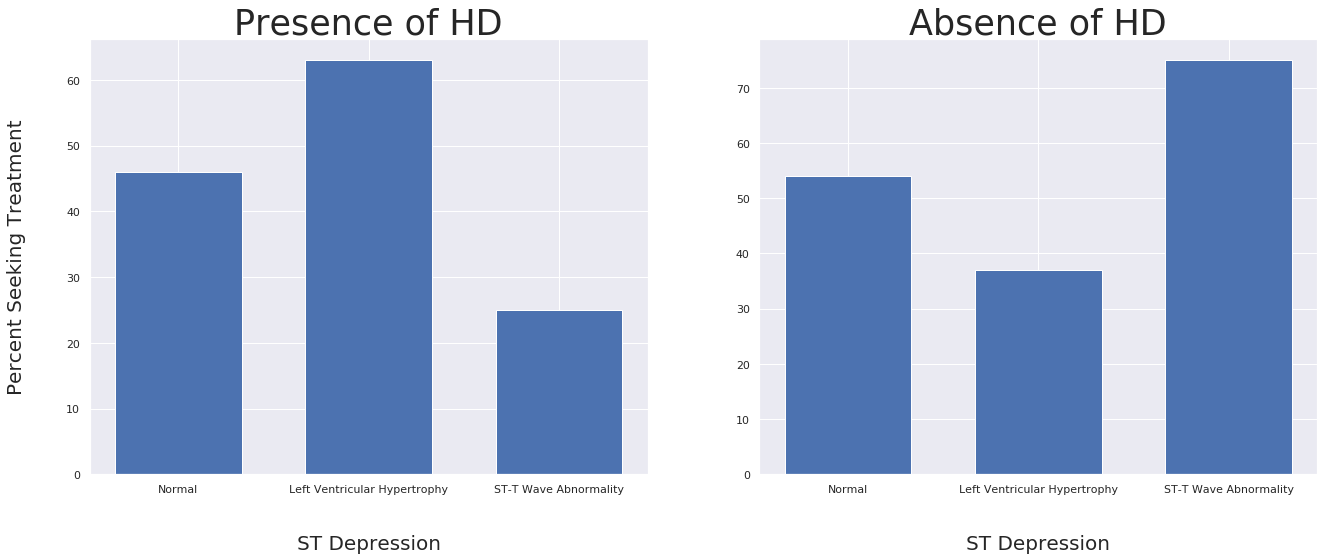

In [75]:
#Normal
NTot=heart3.loc[heart3['resting_EKG']=="Normal"].count()
NTot=pd.DataFrame(NTot)
NTot=NTot.iloc[0,0]

NPHD=PHD.loc[PHD['resting_EKG']=="Normal"].count()
NPHD=pd.DataFrame(NPHD)
NPHD=NPHD.iloc[0,0]

NAHD=AHD.loc[AHD['resting_EKG']=="Normal"].count()
NAHD=pd.DataFrame(NAHD)
NAHD=NAHD.iloc[0,0]

ProNAHD=round(100*(NAHD/NTot))
ProNPHD=round(100*(NPHD/NTot))

#Left Ventricular Hypertrophy
ATot=heart3.loc[heart3['resting_EKG']=="Left Ventricular Hypertrophy"].count()
ATot=pd.DataFrame(ATot)
ATot=ATot.iloc[0,0]

APHD=PHD.loc[PHD['resting_EKG']=="Left Ventricular Hypertrophy"].count()
APHD=pd.DataFrame(APHD)
APHD=APHD.iloc[0,0]

AAHD=AHD.loc[AHD['resting_EKG']=="Left Ventricular Hypertrophy"].count()
AAHD=pd.DataFrame(AAHD)
AAHD=AAHD.iloc[0,0]

ProAAHD=round(100*(AAHD/ATot))
ProAPHD=round(100*(APHD/ATot))
             
#ST-T Wave Abnormality

DTot=heart3.loc[heart3['resting_EKG']=="ST-T Wave Abnormality"].count()
DTot=pd.DataFrame(DTot)
DTot=DTot.iloc[0,0]

DPHD=PHD.loc[PHD['resting_EKG']=="ST-T Wave Abnormality"].count()
DPHD=pd.DataFrame(DPHD)
DPHD=DPHD.iloc[0,0]

DAHD=AHD.loc[AHD['resting_EKG']=="ST-T Wave Abnormality"].count()
DAHD=pd.DataFrame(DAHD)
DAHD=DAHD.iloc[0,0]

ProDAHD=round(100*(DAHD/DTot))
ProDPHD=round(100*(DPHD/DTot))

plt.subplot(1,2,1)
y = [ProNPHD, ProAPHD, ProDPHD]
x = ["Normal","Left Ventricular Hypertrophy","ST-T Wave Abnormality"]
width = 1/1.5
plt.bar(x, y, width)
plt.ylabel("Percent Seeking Treatment", labelpad=40, size=20)
plt.xlabel("ST Depression", labelpad=40, size=20)
plt.title("Presence of HD", size=35)

plt.subplot(1,2,2)
y = [ProNAHD, ProAAHD, ProDAHD]
x = ["Normal","Left Ventricular Hypertrophy","ST-T Wave Abnormality"]
width = 1/1.5
plt.bar(x, y, width)
plt.xlabel("ST Depression", labelpad=40, size=20)
plt.title("Absence of HD", size=35)

EKG = pd.DataFrame(columns=['Present_HD', 'Absent_HD'])
EKG.loc["Normal", "Present_HD"]=ProNPHD
EKG.loc["Normal", "Absent_HD"]=ProNAHD
EKG.loc["Left Ventricular Hypertrophy", "Present_HD"]=ProAPHD
EKG.loc["Left Ventricular Hypertrophy", "Absent_HD"]=ProAAHD
EKG.loc["ST-T Wave Abnormality", "Present_HD"]=ProDPHD
EKG.loc["ST-T Wave Abnormality", "Absent_HD"]=ProDAHD

print(EKG)

Overall:
* There is a positive small correlation to the prescence of Left Ventricular Hypertrophy and the prescence of Heart Disease.
    * In this study, 63% of people with a Left Ventricular Hypertrophy were diagnosed with Heart Disease.
* In this study, 75% of people with a ST-T Wave Abnormality were diagnosed with Heart Disease.  However, only 4 people had this result, which does not give it much weight.


### <a id=''>12. Serum Cholesterol (mg/ dL) </a> 
**Correlation with Diagnosis of Heart Disease: -0.100950**

(100, 410)

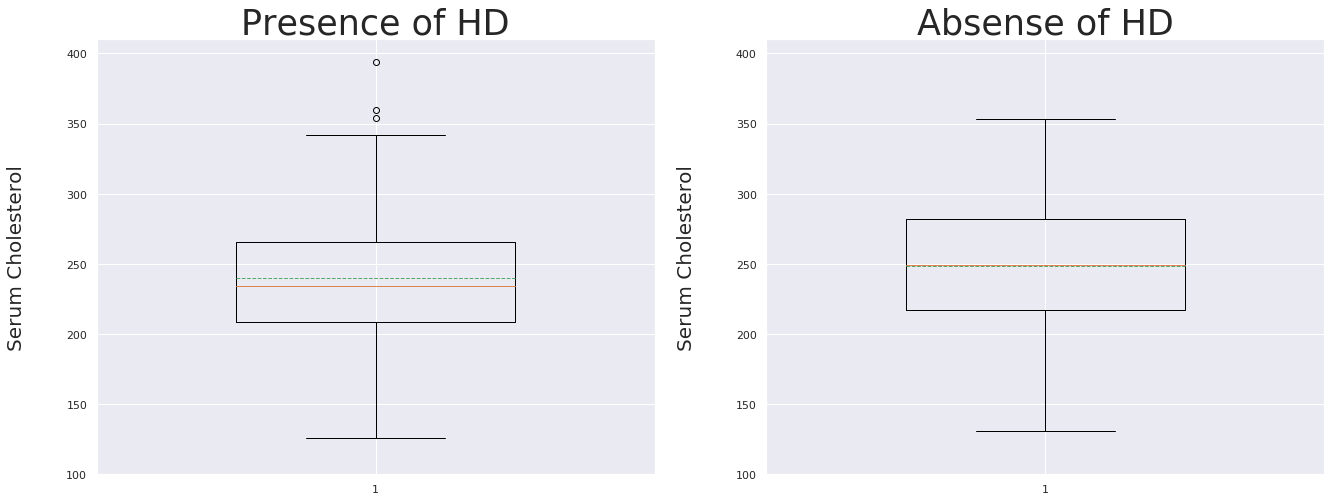

In [76]:
plt.subplot(1,2,1)
matplotlib.pyplot.boxplot(PHD['chol'], widths=0.5, meanline=True, showmeans=True)
plt.title("Presence of HD", size=35)
plt.ylabel("Serum Cholesterol", labelpad=40, size=20)
plt.ylim(100, 410)


plt.subplot(1,2,2)
matplotlib.pyplot.boxplot(AHD['chol'], widths=0.5, meanline=True, showmeans=True)
plt.title("Absense of HD", size=35)
plt.ylabel("Serum Cholesterol", labelpad=40, size=20)
plt.ylim(100, 410)

Overall:
* There is a very small association between lower serum cholestrol and the presence of Heart Disease.  

### <a id=''>13. Fasting Bloodsugar (mmol/ L) </a> 
**Correlation with Diagnosis of Heart Disease: -0.026826**

Text(0.5, 0, 'Blood Sugar Level')

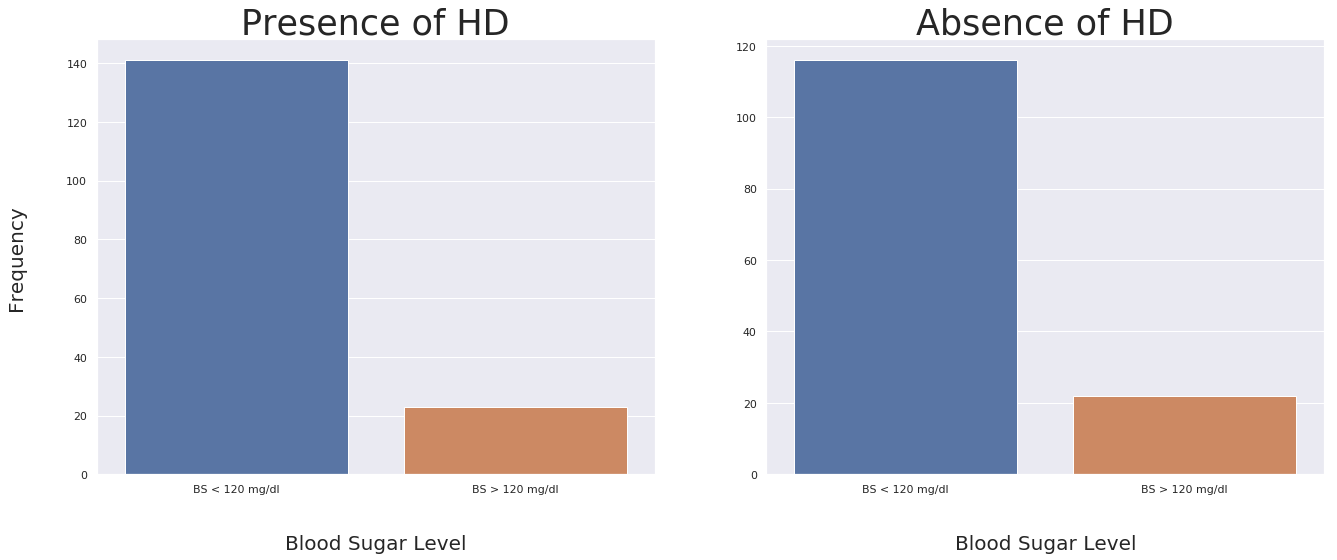

In [77]:
plt.subplot(1,2,1)
sns.countplot(PHD['fasting_BS'], order=["BS < 120 mg/dl", "BS > 120 mg/dl"])
plt.title("Presence of HD", size=35)
plt.ylabel("Frequency", labelpad=40, size=20)
plt.xlabel("Blood Sugar Level", labelpad=40, size=20)

plt.subplot(1,2,2)
sns.countplot(AHD['fasting_BS'], order=["BS < 120 mg/dl", "BS > 120 mg/dl"])
plt.title("Absence of HD", size=35)
plt.ylabel("    ", labelpad=40, size=20)
plt.xlabel("Blood Sugar Level", labelpad=40, size=20)

Overall:
* There is a negligible correlation between fasting blood sugar and the diagnosis of Heart Disease.  
    * This is most likely due to the fact that in both cases (absence or presence of Heart Disease) very few patients had a blood sugar level greater than 120.

# <a id=''>13. FIN </a> 